## Exploring Spread of Covid using Occupation and Healthcare Access Parameters as predictor

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
linreg = LinearRegression()
sb.set()

In [3]:
# Helper Functions
# Removing Outliers
def removeOutliers(df): 
    temp = pd.DataFrame() 
    for var in df: 
        Q1 = df[var].quantile(0.25) 
        Q3 = df[var].quantile(0.75) 
        IQR = Q3 - Q1 
        temp[var] = df[var][((df[var] > (Q1 - 1.5 * IQR)) & (df[var] < (Q3 + 1.5 * IQR)))] 
        temp = temp.dropna()
    return temp

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

In [4]:
usacovid = pd.read_csv('county_megaset.csv')
usacovid['Death to Case Ratio'] = pd.DataFrame(usacovid['Deaths']/usacovid['Confirmed'])
usacovid.head()

,COUNTYNS,Geographic Identifier - FIPS Code,Area of Land (square meters),Area of Water (square meters),Name,State,Average Household Size,Average Household Size - Margin of Error,Average Household Size of Owner-Occupied Unit,Average Household Size of Owner-Occupied Unit - Margin of Error,...,Confirmed,Deaths,Death to Case Ratio,Total population without healthcare access,Total Healthcare-related workers,Case Incidence (Per 100000),Death density (Per 100000),Death Rate (%),Total Population.1,Percentage of Healthcare related workers
0,161526,1001,1.539602e+09,25706961,Autauga County,Alabama,2.59,0.05,2.59,0.07,...,932,20,0.021459,3856,2013,1688.405797,36.231884,2.145923,55200,0.036467
1,161527,1003,4.117547e+09,1133055836,Baldwin County,Alabama,2.61,0.04,2.66,0.06,...,2727,17,0.006234,18679,8722,1310.383601,8.168875,0.623396,208107,0.041911
2,161528,1005,2.292145e+09,50538698,Barbour County,Alabama,2.49,0.07,2.44,0.11,...,529,4,0.007561,2544,500,2051.819099,15.514700,0.756144,25782,0.019393
3,161529,1007,1.612167e+09,9602089,Bibb County,Alabama,2.99,0.14,3.05,0.18,...,327,2,0.006116,2201,610,1451.591424,8.878235,0.611621,22527,0.027079
4,161530,1009,1.670104e+09,15015423,Blount County,Alabama,2.77,0.05,2.85,0.07,...,601,1,0.001664,6159,2402,1042.588256,1.734756,0.166389,57645,0.041669


In [5]:
usacovid.describe()

,COUNTYNS,Geographic Identifier - FIPS Code,Area of Land (square meters),Area of Water (square meters),Average Household Size,Average Household Size - Margin of Error,Average Household Size of Owner-Occupied Unit,Average Household Size of Owner-Occupied Unit - Margin of Error,Average Household Size of Renter-Occupied Unit,Average Household Size of Renter-Occupied Unit - Margin of Error,...,Confirmed,Deaths,Death to Case Ratio,Total population without healthcare access,Total Healthcare-related workers,Case Incidence (Per 100000),Death density (Per 100000),Death Rate (%),Total Population.1,Percentage of Healthcare related workers
count,3.220000e+03,3220.000000,3.220000e+03,3.220000e+03,3220.000000,3220.000000,3219.000000,3219.000000,3220.000000,3220.000000,...,3220.000000,3220.00000,3159.000000,3220.000000,3220.000000,3220.000000,3220.000000,3159.000000,3.220000e+03,3220.000000
mean,9.628897e+05,31393.605280,2.844093e+09,2.143251e+08,2.529093,0.081494,2.563088,0.102336,2.444950,0.202314,...,1316.137578,45.27764,0.021551,8839.888199,4496.219876,878.110783,21.572191,2.155149,1.013323e+05,0.040779
std,5.174236e+05,16292.078954,9.255389e+09,1.220804e+09,0.279374,0.067781,0.274885,0.079810,0.393263,0.182878,...,6962.304363,456.31641,0.028900,35466.447087,14234.696765,983.144191,43.779483,2.890047,3.260964e+05,0.011618
min,2.390100e+04,1001.000000,5.300265e+06,0.000000e+00,1.340000,0.010000,1.790000,0.010000,1.360000,0.010000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.500000e+01,0.000000
25%,4.849888e+05,19032.500000,1.085268e+09,7.009854e+06,2.350000,0.040000,2.400000,0.050000,2.200000,0.100000,...,43.000000,0.00000,0.000000,923.750000,414.750000,274.108881,0.000000,0.000000,1.121425e+04,0.033565
50%,9.741585e+05,30024.000000,1.565689e+09,1.938601e+07,2.490000,0.070000,2.520000,0.090000,2.400000,0.170000,...,158.000000,2.00000,0.012367,2259.500000,1026.500000,565.918482,7.877843,1.236749,2.595050e+04,0.041086
75%,1.419973e+06,46105.500000,2.368884e+09,6.069241e+07,2.650000,0.100000,2.690000,0.130000,2.640000,0.250000,...,585.000000,13.00000,0.029668,5625.500000,2936.000000,1165.665050,25.783948,2.966814,6.655225e+04,0.048482
max,2.516404e+06,72153.000000,3.770000e+11,2.599228e+10,4.970000,1.140000,4.880000,1.460000,6.810000,5.490000,...,224051.000000,23500.00000,0.285714,965181.000000,420757.000000,16306.278070,1439.527590,28.571429,1.009805e+07,0.118237


In merging all data sets, we now have over 300 columns of data, many of which can be used as predictor variables for our study. In this portion, we will be using occupation and healthcare and their associated parameters as predictors for covid cases, covid related deaths, and finally the death-to-case ratio. 

The predictor variable of choice in this portion will be:
> Total - Civilian employed population 16 years and over

> Percentage of Healthcare related workers

> Total Healthcare-related workers

> Percent of Population with No Health Insurance Coverage

Our belief is that the number of civilians employed, number of healthcare workers, number of civilians without healthcare access and the number of population with no health insurance coverage will affect the spread of Covid-19 as a higher number of civilians working implies that they are more exposed to the virus compared to the civilians who are not working. Civilians who work in healthcare institutions is believed to be more exposed to the virus compared to civilians who work in non-healthcare institutions. Also, the civilians without healthcare access and with no health insurance coverage would mean that they are more prone to the virus.

In [6]:
usacovid_occuphealth = usacovid[['Total - Civilian employed population 16 years and over','Percentage of Healthcare related workers', 'Total Healthcare-related workers', 'Total population without healthcare access', 'Percent of Population with No Health Insurance Coverage', 'Confirmed', 'Deaths', 'Death to Case Ratio', 'Case Incidence (Per 100000)']]


## Bi-Variate Analysis: Total Cilivian 16 years and over employed and Total Healthcare-related workers as a predictor variable.

In [7]:
usacovid_occup = usacovid_occuphealth[['Total - Civilian employed population 16 years and over', 'Percentage of Healthcare related workers', 'Total Healthcare-related workers', 'Confirmed', 'Deaths', 'Death to Case Ratio', 'Case Incidence (Per 100000)']]
usacovid_occup.head()

,Total - Civilian employed population 16 years and over,Percentage of Healthcare related workers,Total Healthcare-related workers,Confirmed,Deaths,Death to Case Ratio,Case Incidence (Per 100000)
0,24522,0.036467,2013,932,20,0.021459,1688.405797
1,95091,0.041911,8722,2727,17,0.006234,1310.383601
2,8413,0.019393,500,529,4,0.007561,2051.819099
3,8387,0.027079,610,327,2,0.006116,1451.591424
4,21917,0.041669,2402,601,1,0.001664,1042.588256


In [8]:
usacovid_occup.describe()

,Total - Civilian employed population 16 years and over,Percentage of Healthcare related workers,Total Healthcare-related workers,Confirmed,Deaths,Death to Case Ratio,Case Incidence (Per 100000)
count,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.00000,3159.000000,3220.000000
mean,4.840705e+04,0.040779,4496.219876,1316.137578,45.27764,0.021551,878.110783
std,1.607070e+05,0.011618,14234.696765,6962.304363,456.31641,0.028900,983.144191
min,3.300000e+01,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,4.608000e+03,0.033565,414.750000,43.000000,0.00000,0.000000,274.108881
50%,1.075000e+04,0.041086,1026.500000,158.000000,2.00000,0.012367,565.918482
75%,2.948300e+04,0.048482,2936.000000,585.000000,13.00000,0.029668,1165.665050
max,4.929863e+06,0.118237,420757.000000,224051.000000,23500.00000,0.285714,16306.278070


Before commencing with the bi-variate exploration against our desired response variable, we do a uni-variate analysis of our predictor variable and observe how our predictor variable of Total - Civilian employed population 16 years and over and Total Healthcare-related workers is distributed amongst the different counties of the US.

<AxesSubplot:>

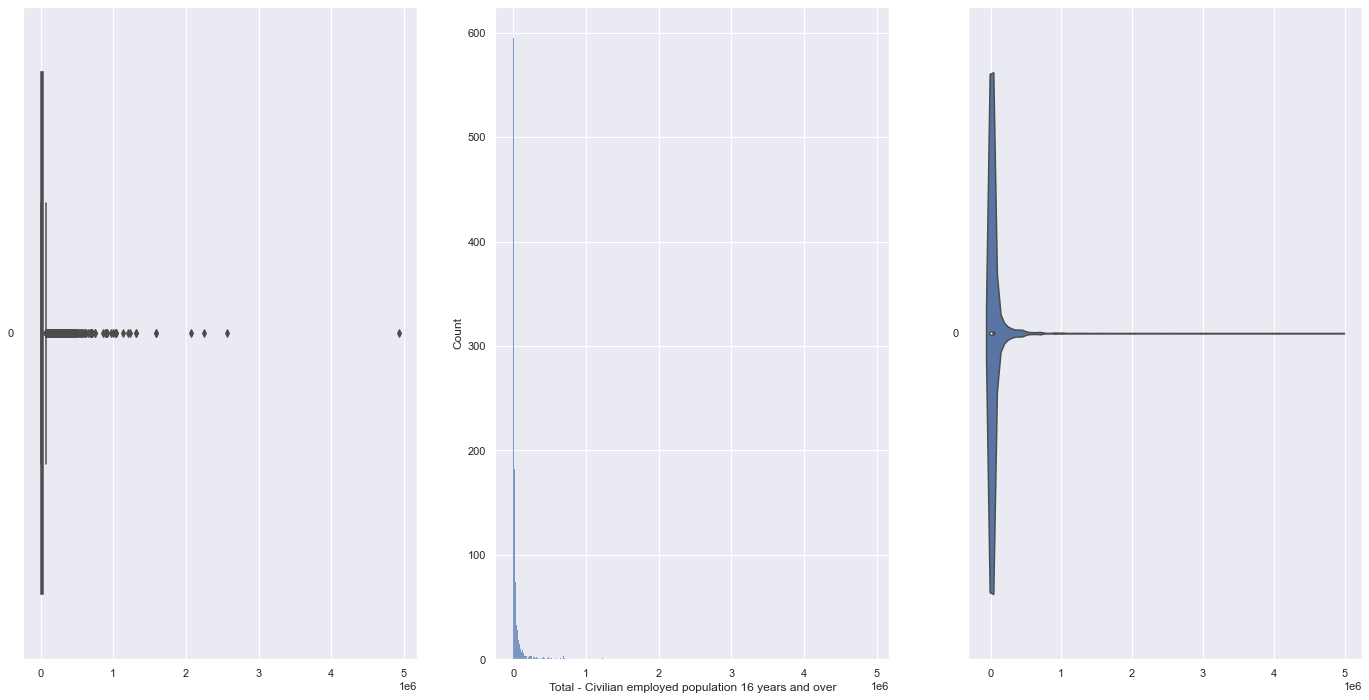

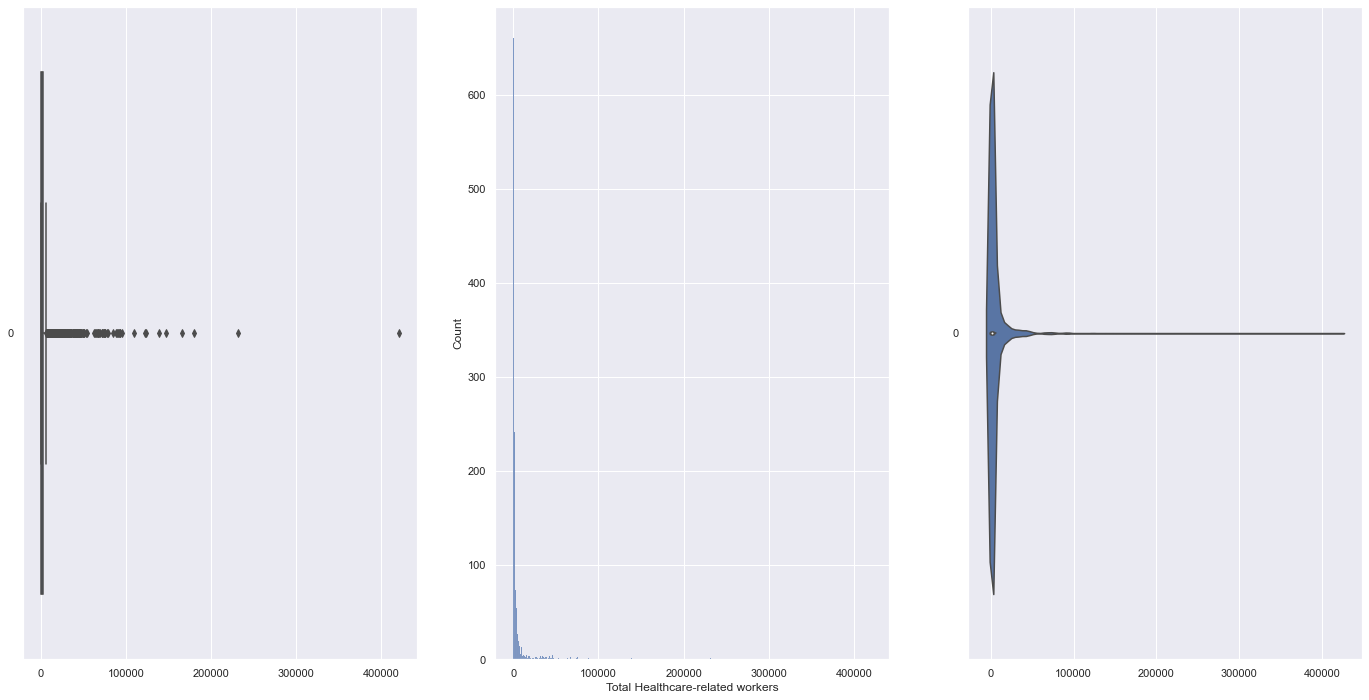

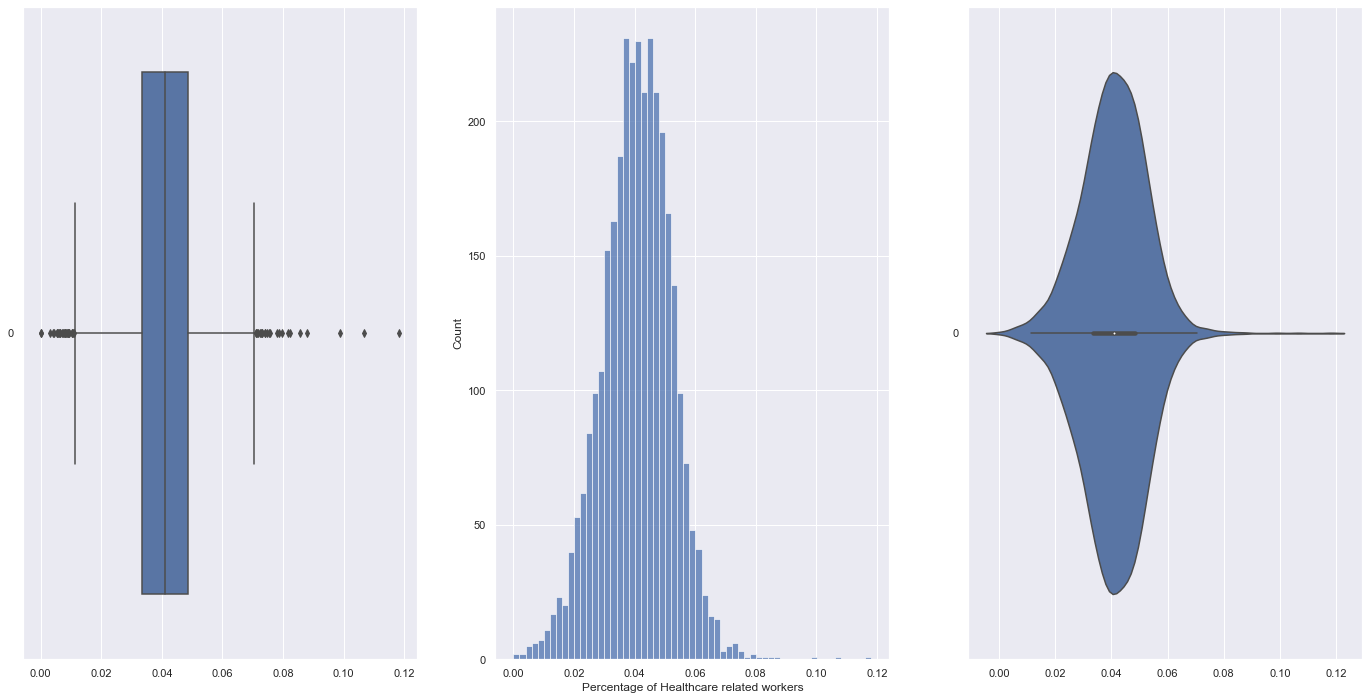

In [9]:
f, axes = plt.subplots(1, 3, figsize=(24, 12))

sb.boxplot(data = usacovid_occuphealth['Total - Civilian employed population 16 years and over'], orient = "h", ax = axes[0])
sb.histplot(data = usacovid_occuphealth['Total - Civilian employed population 16 years and over'], ax = axes[1])
sb.violinplot(data = usacovid_occuphealth['Total - Civilian employed population 16 years and over'], orient = "h", ax = axes[2])

f, axes = plt.subplots(1, 3, figsize=(24, 12))

sb.boxplot(data = usacovid_occuphealth['Total Healthcare-related workers'], orient = "h", ax = axes[0])
sb.histplot(data = usacovid_occuphealth['Total Healthcare-related workers'], ax = axes[1])
sb.violinplot(data = usacovid_occuphealth['Total Healthcare-related workers'], orient = "h", ax = axes[2])

f, axes = plt.subplots(1, 3, figsize=(24, 12))

sb.boxplot(data = usacovid_occuphealth['Percentage of Healthcare related workers'], orient = "h", ax = axes[0])
sb.histplot(data = usacovid_occuphealth['Percentage of Healthcare related workers'], ax = axes[1])
sb.violinplot(data = usacovid_occuphealth['Percentage of Healthcare related workers'], orient = "h", ax = axes[2])

In [10]:
usacovid_occup['Total - Civilian employed population 16 years and over'].skew()

13.696390451589174

In [11]:
usacovid_occup['Total Healthcare-related workers'].skew()

12.632184887289826

In [12]:
usacovid_occup['Percentage of Healthcare related workers'].skew()

0.04816351466667711

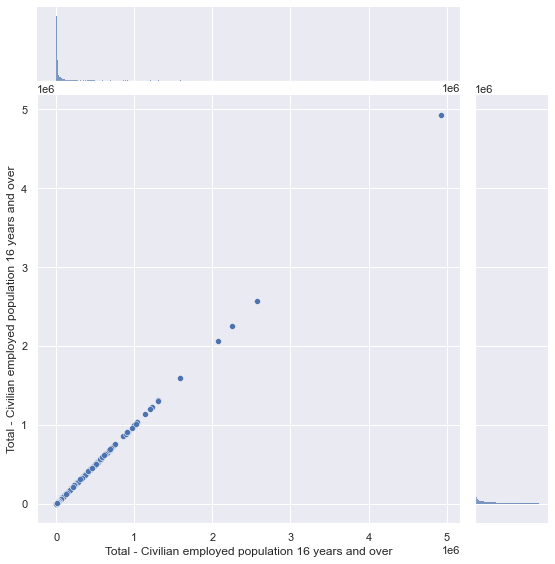

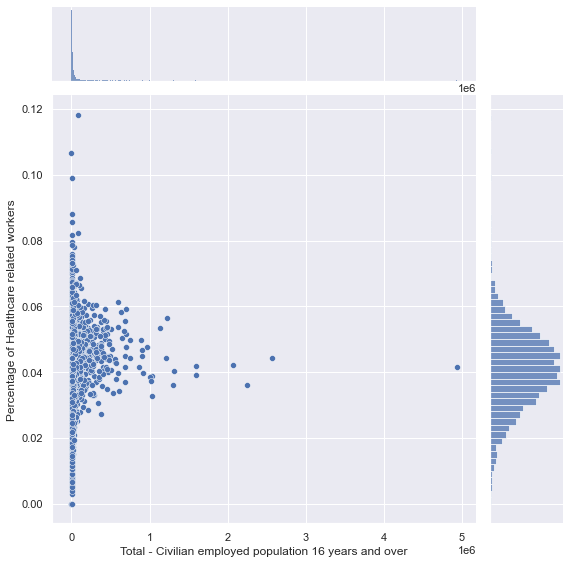

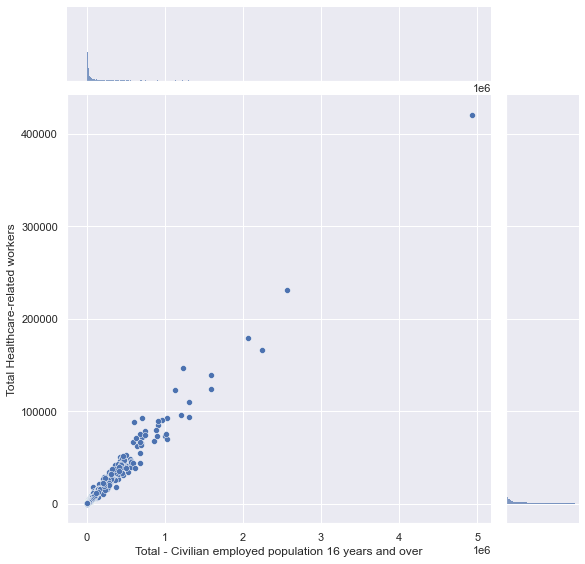

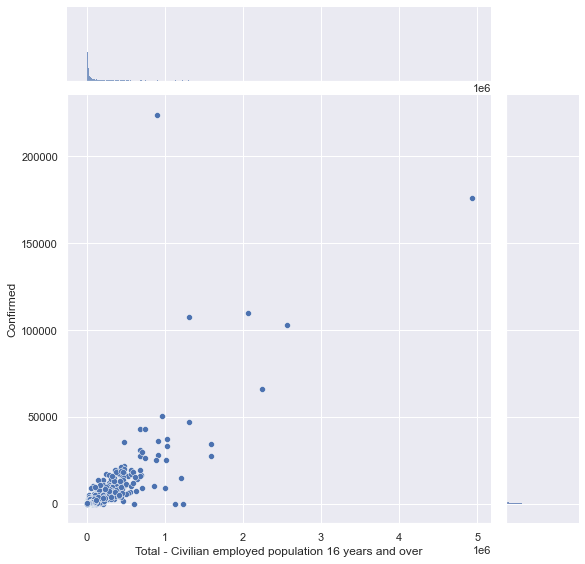

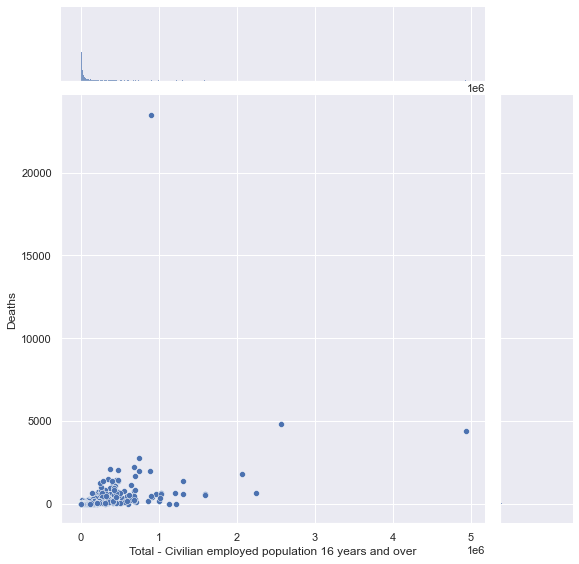

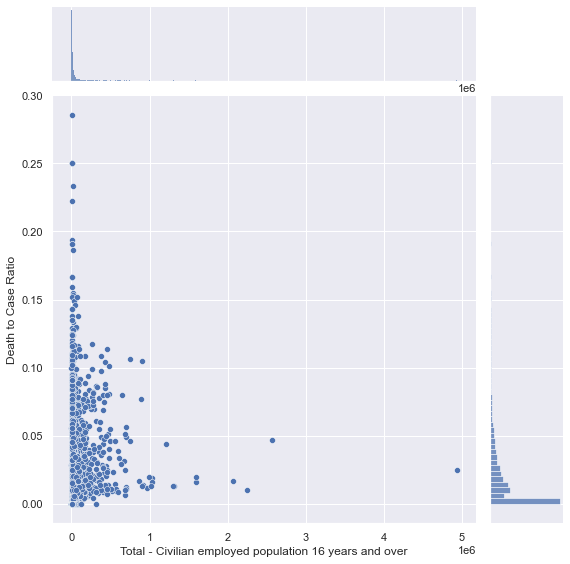

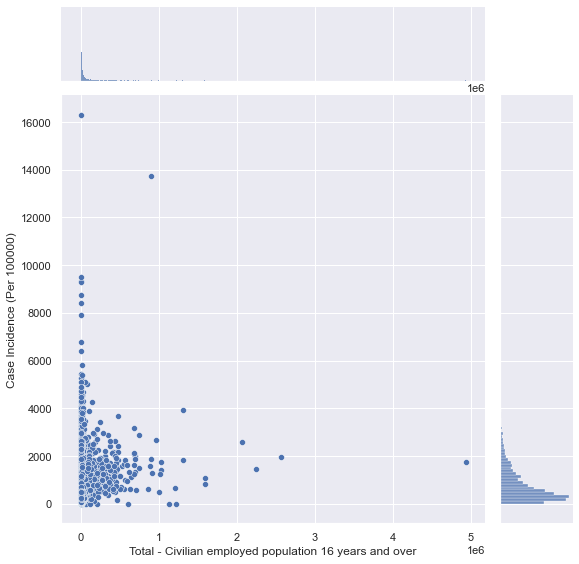

In [13]:
for var in usacovid_occup:
    sb.jointplot(data = usacovid_occup, x = "Total - Civilian employed population 16 years and over", y = var, height = 8)

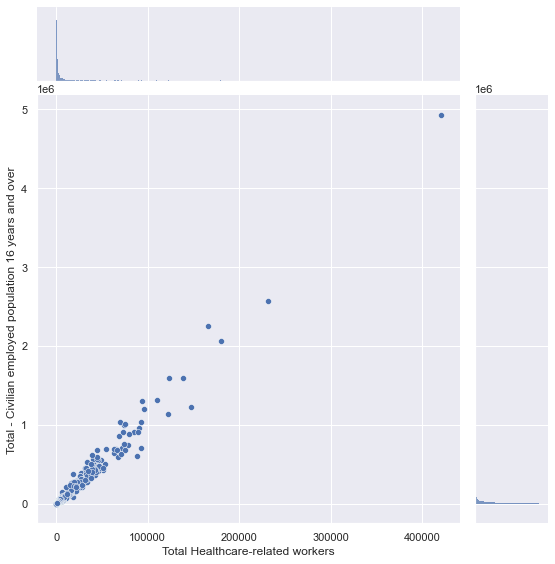

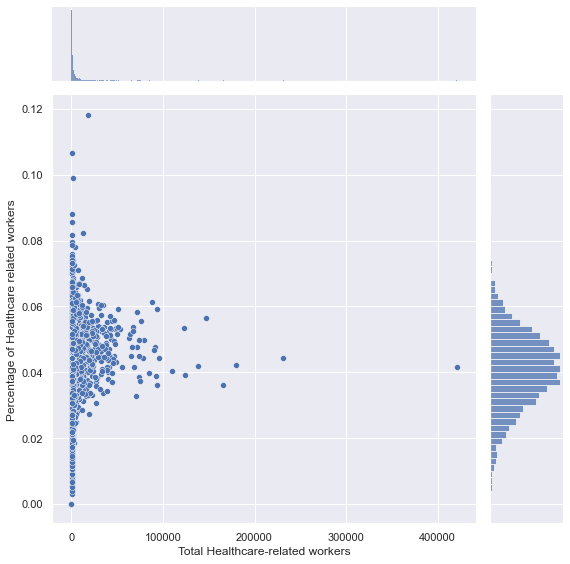

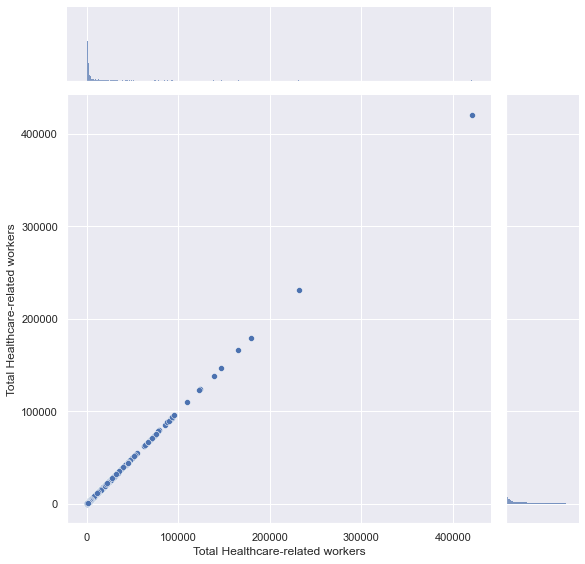

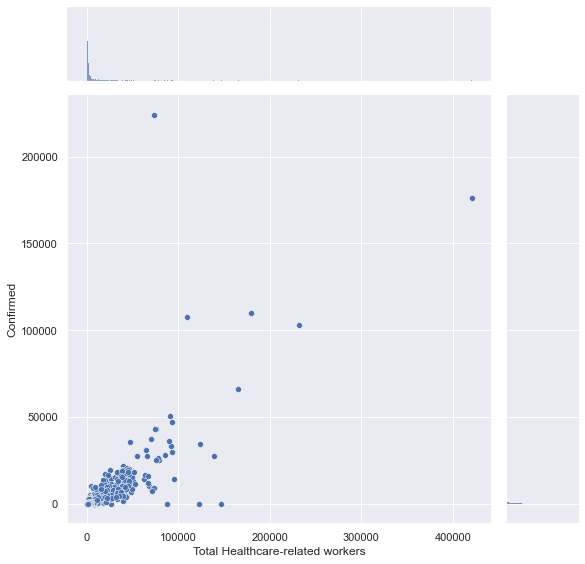

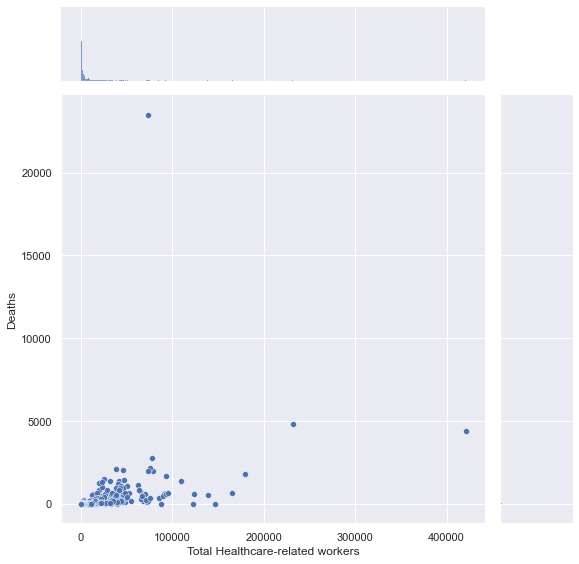

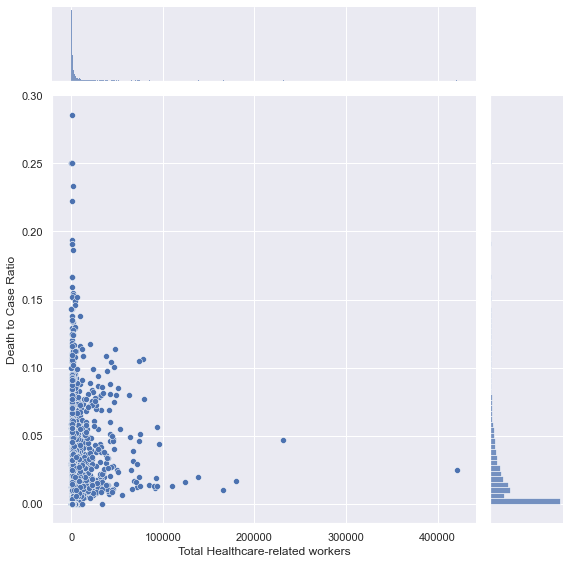

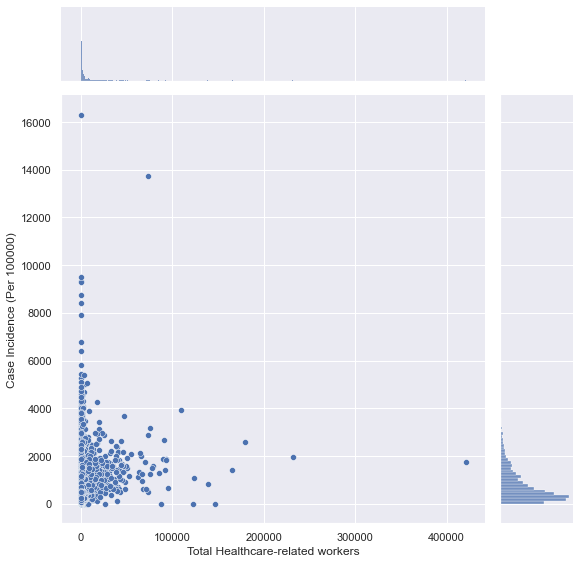

In [14]:
for var in usacovid_occup:
    sb.jointplot(data = usacovid_occup, x = "Total Healthcare-related workers", y = var, height = 8)

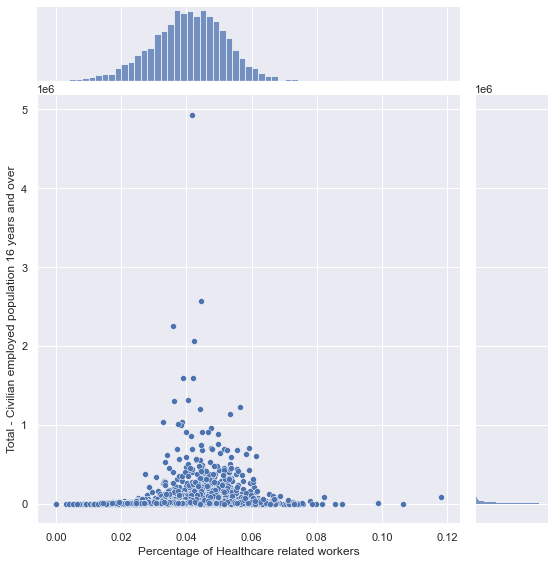

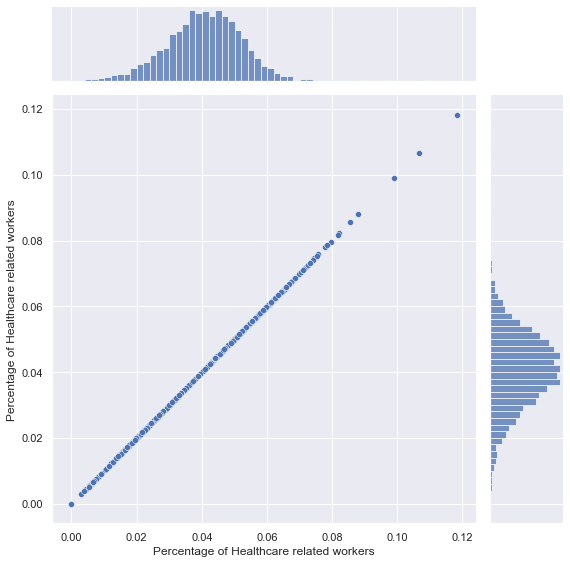

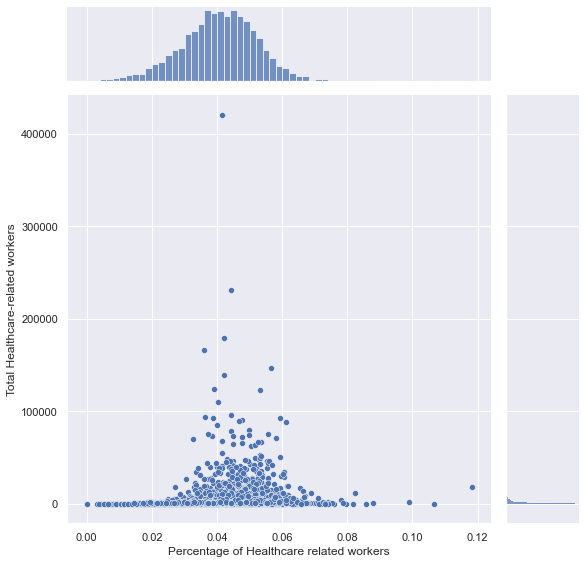

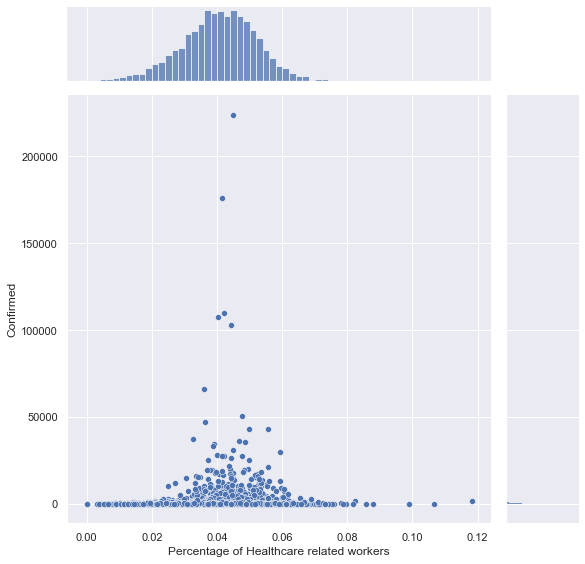

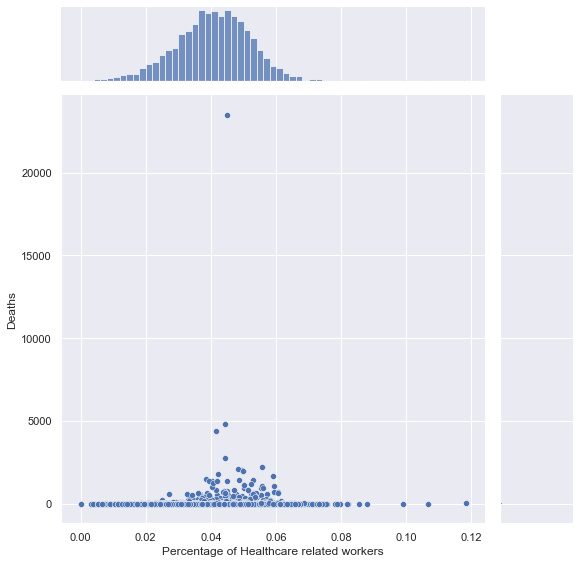

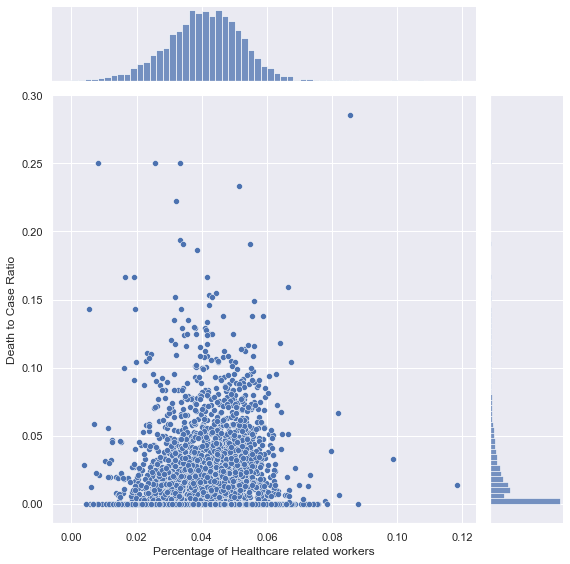

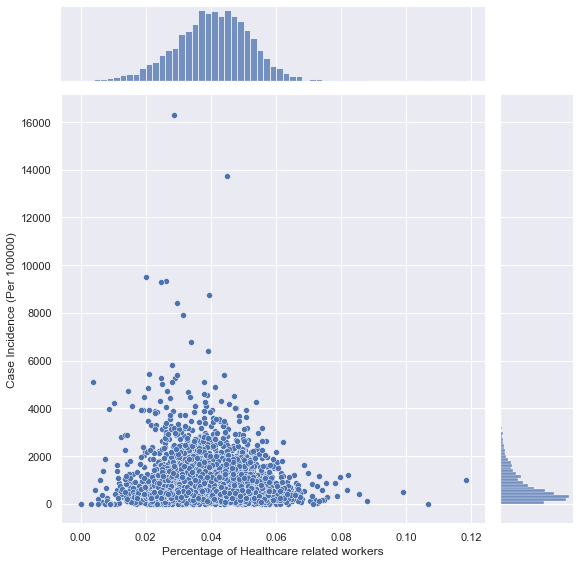

In [15]:
for var in usacovid_occup:
    sb.jointplot(data = usacovid_occup, x = "Percentage of Healthcare related workers", y = var, height = 8)

In [16]:
usacovid_occup.corr()

,Total - Civilian employed population 16 years and over,Percentage of Healthcare related workers,Total Healthcare-related workers,Confirmed,Deaths,Death to Case Ratio,Case Incidence (Per 100000)
Total - Civilian employed population 16 years and over,1.000000,0.100887,0.989096,0.796636,0.401484,0.090096,0.132822
Percentage of Healthcare related workers,0.100887,1.000000,0.139218,0.046160,0.040940,0.079415,-0.134617
Total Healthcare-related workers,0.989096,0.139218,1.000000,0.776624,0.399354,0.104059,0.128104
Confirmed,0.796636,0.046160,0.776624,1.000000,0.794622,0.084918,0.296615
Deaths,0.401484,0.040940,0.399354,0.794622,1.000000,0.135629,0.284435
Death to Case Ratio,0.090096,0.079415,0.104059,0.084918,0.135629,1.000000,0.094840
Case Incidence (Per 100000),0.132822,-0.134617,0.128104,0.296615,0.284435,0.094840,1.000000


<AxesSubplot:>

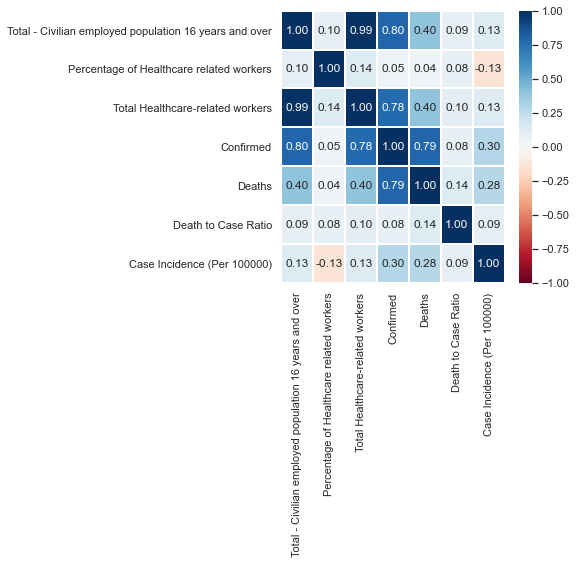

In [17]:
f = plt.figure(figsize=(5, 5))
sb.heatmap(usacovid_occup.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 12}, cmap = "RdBu")

Placing each of the response variables against the predictor variable *Total - Civilian employed population 16 years and over*, *Total Healthcare-related workers* and *Percentage of Healthcare related workers*, we see that the correlation between the variables to be fairly high for *Confirmed* cases, moderately high for *Deaths* except for the *Percentage of Healthcare related workers* variable. It also seems like the *Case Incidence* variable fits into the distribution of both *Total - Civilian employed population 16 years and over* and *Total Healthcare-related workers*, wita little negative correlation with *Percentage of Healthcare related workers*. That is quite interesting. Now, let's see if the situation will change when we remove the outliers.

In [18]:
usacovid_occup_clean = pd.DataFrame(removeOutliers(usacovid_occup))

In [19]:
usacovid_occup_clean.head()

,Total - Civilian employed population 16 years and over,Percentage of Healthcare related workers,Total Healthcare-related workers,Confirmed,Deaths,Death to Case Ratio,Case Incidence (Per 100000)
0,24522,0.036467,2013.0,932.0,20.0,0.021459,1688.405797
2,8413,0.019393,500.0,529.0,4.0,0.007561,2051.819099
3,8387,0.027079,610.0,327.0,2.0,0.006116,1451.591424
4,21917,0.041669,2402.0,601.0,1.0,0.001664,1042.588256
7,47896,0.036265,4174.0,1157.0,6.0,0.005186,1005.230325


In [20]:
usacovid_occup_clean.describe()

,Total - Civilian employed population 16 years and over,Percentage of Healthcare related workers,Total Healthcare-related workers,Confirmed,Deaths,Death to Case Ratio,Case Incidence (Per 100000)
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,12735.227948,0.040144,1215.950655,191.517031,3.315721,0.013742,634.218814
std,12360.844441,0.010954,1223.765178,239.279974,5.600066,0.017057,535.569182
min,172.000000,0.011276,7.000000,1.000000,0.000000,0.000000,17.765145
25%,4076.250000,0.032832,367.250000,34.000000,0.000000,0.000000,246.687119
50%,8315.000000,0.040278,775.000000,99.000000,1.000000,0.008130,446.221868
75%,17462.500000,0.047872,1662.750000,255.750000,4.000000,0.022198,861.205344
max,65645.000000,0.070517,6700.000000,1386.000000,32.000000,0.074074,2480.875098


<AxesSubplot:>

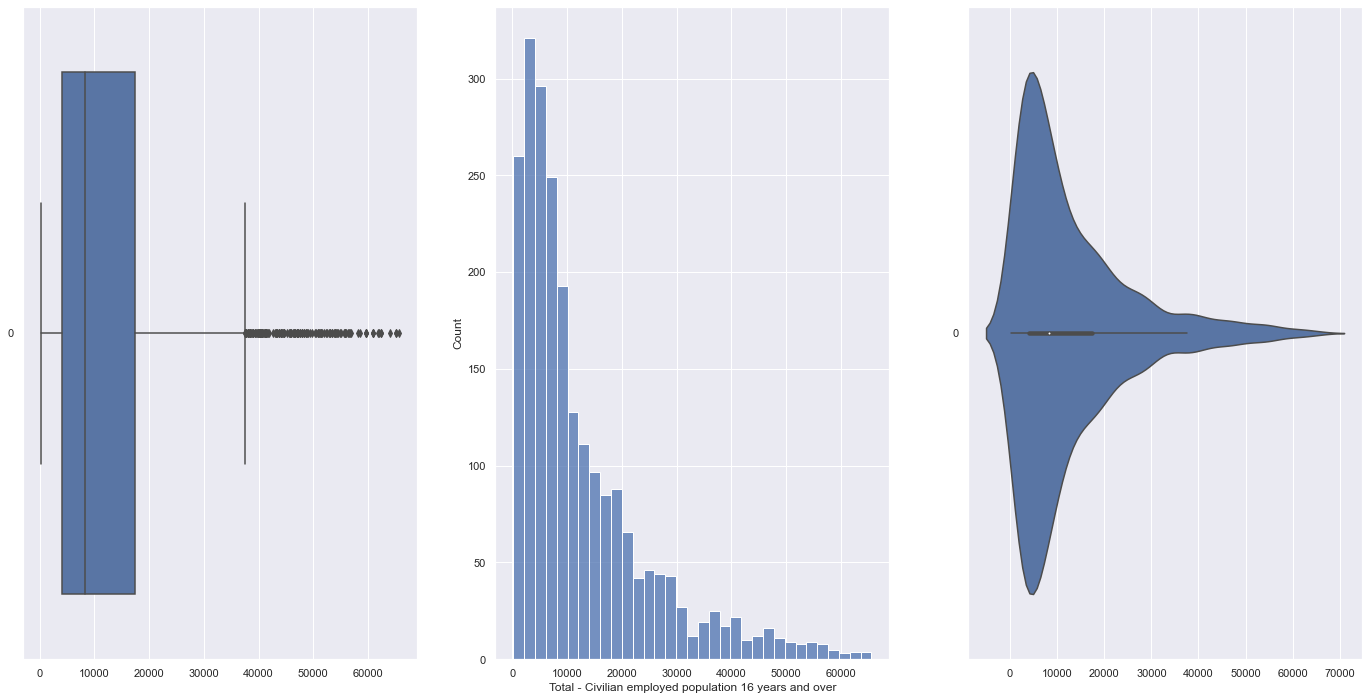

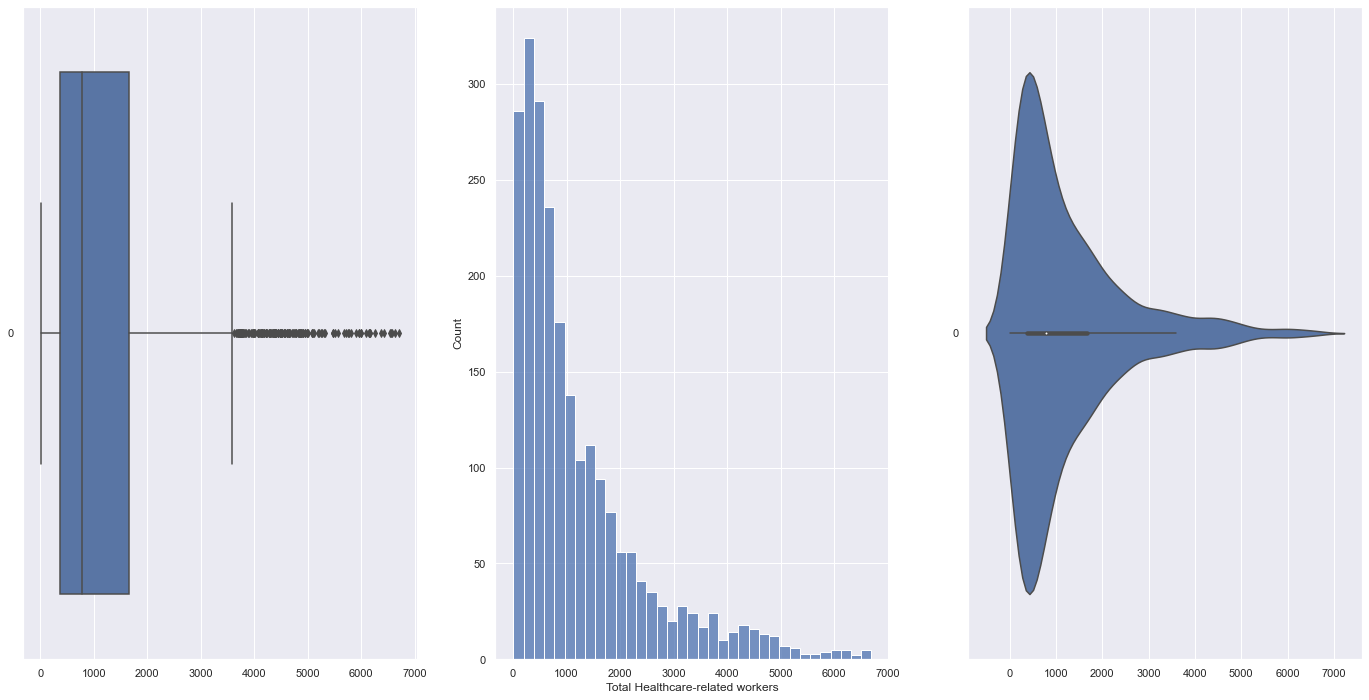

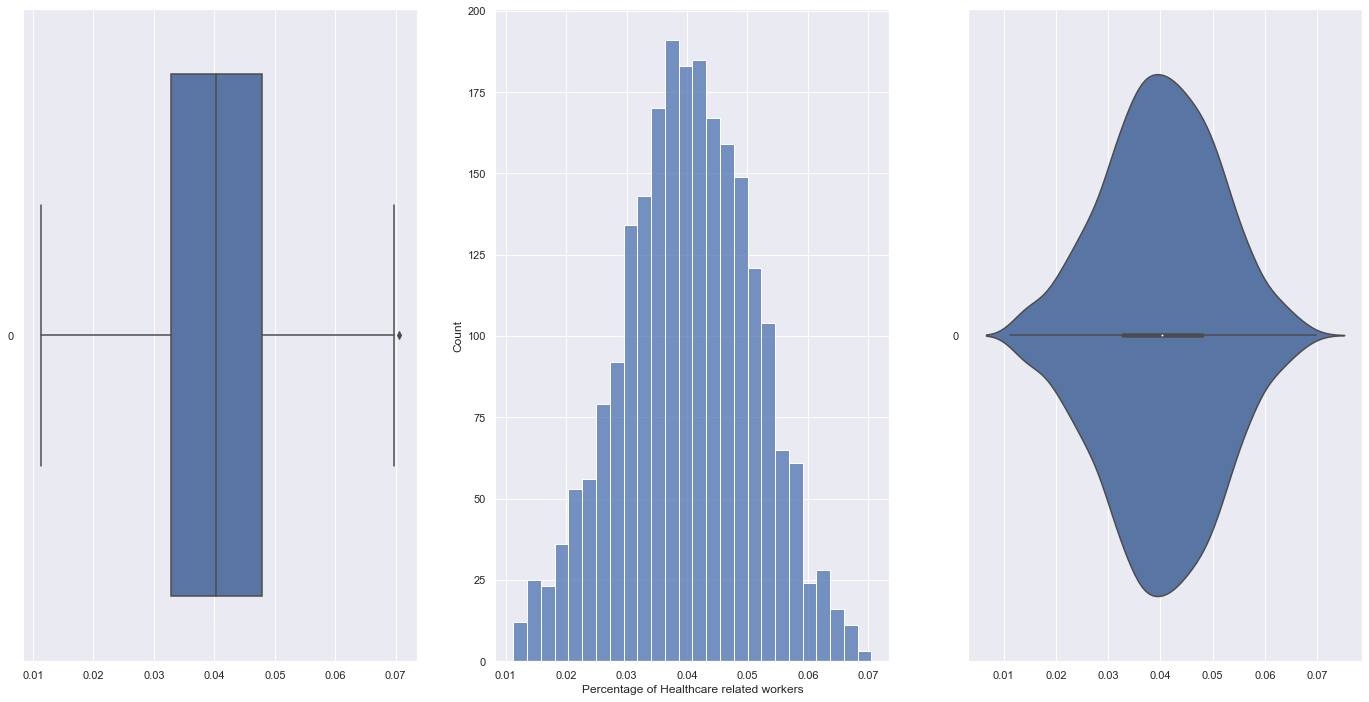

In [21]:
f, axes = plt.subplots(1, 3, figsize=(24, 12))

sb.boxplot(data = usacovid_occup_clean['Total - Civilian employed population 16 years and over'], orient = "h", ax = axes[0])
sb.histplot(data = usacovid_occup_clean['Total - Civilian employed population 16 years and over'], ax = axes[1])
sb.violinplot(data = usacovid_occup_clean['Total - Civilian employed population 16 years and over'], orient = "h", ax = axes[2])

f, axes = plt.subplots(1, 3, figsize=(24, 12))

sb.boxplot(data = usacovid_occup_clean['Total Healthcare-related workers'], orient = "h", ax = axes[0])
sb.histplot(data = usacovid_occup_clean['Total Healthcare-related workers'], ax = axes[1])
sb.violinplot(data = usacovid_occup_clean['Total Healthcare-related workers'], orient = "h", ax = axes[2])

f, axes = plt.subplots(1, 3, figsize=(24, 12))

sb.boxplot(data = usacovid_occup_clean['Percentage of Healthcare related workers'], orient = "h", ax = axes[0])
sb.histplot(data = usacovid_occup_clean['Percentage of Healthcare related workers'], ax = axes[1])
sb.violinplot(data = usacovid_occup_clean['Percentage of Healthcare related workers'], orient = "h", ax = axes[2])

In [22]:
usacovid_occup_clean['Total - Civilian employed population 16 years and over'].skew()

1.685090062868252

In [23]:
usacovid_occup_clean['Total Healthcare-related workers'].skew()

1.760275995511564

In [24]:
usacovid_occup_clean['Percentage of Healthcare related workers'].skew()

-0.08501589256775911

With the outliers removed, we see a relatively symmetrical distribution for *Total - Civilian employed population 16 years and over* and *Total Healthcare-related workers*, with a much lower skewness at 1.69 and 1.76. However, it is still heavily right skewed. On the other hand, the *Percentage of Healthcare related workers* variable seems to be negatively skewed after removing the outliers, interesting. Nevertheless, let us plot this new data set without outliers against our response variables.

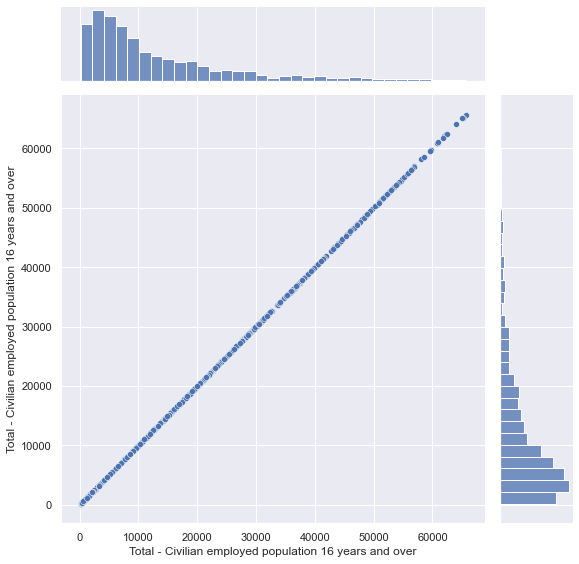

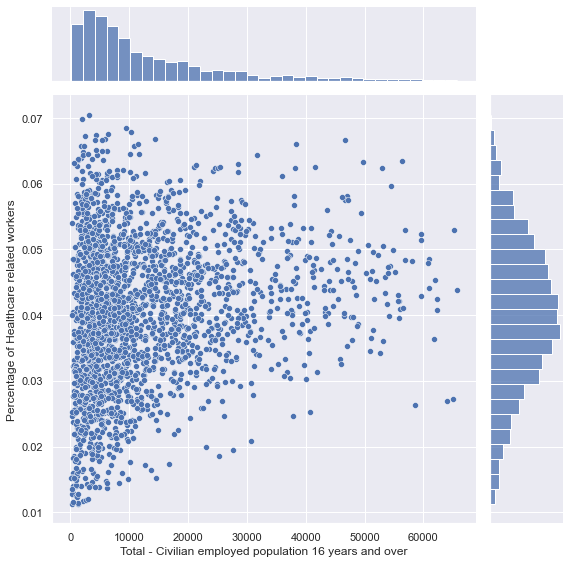

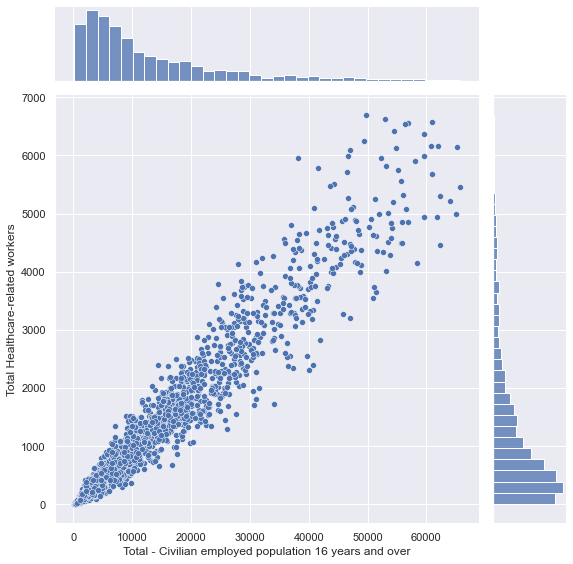

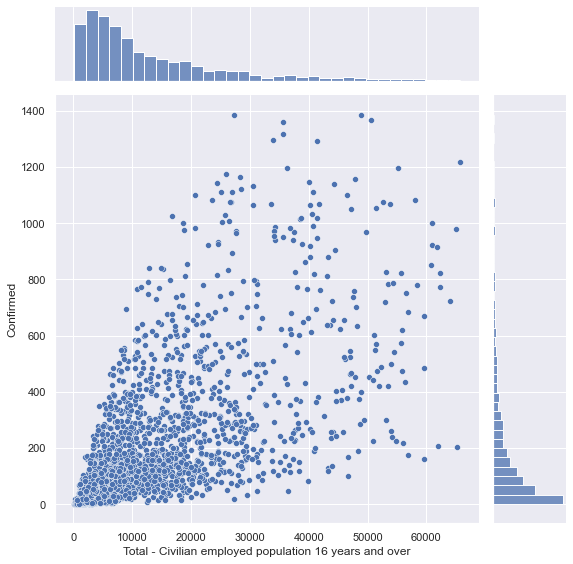

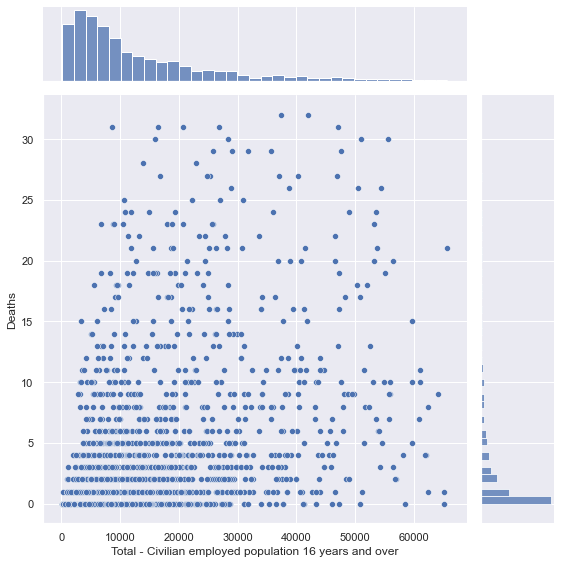

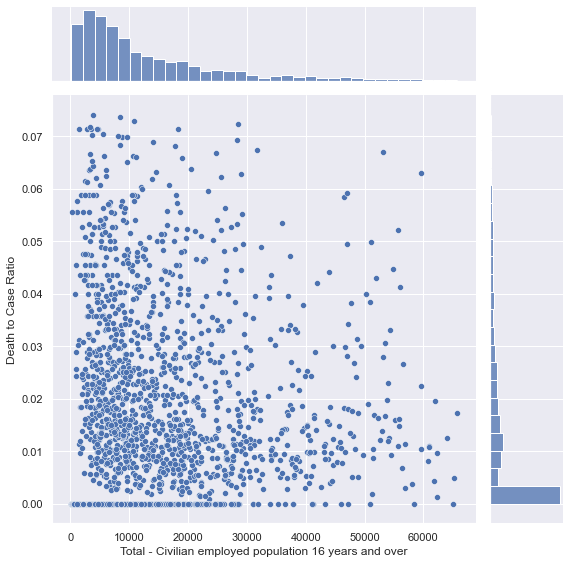

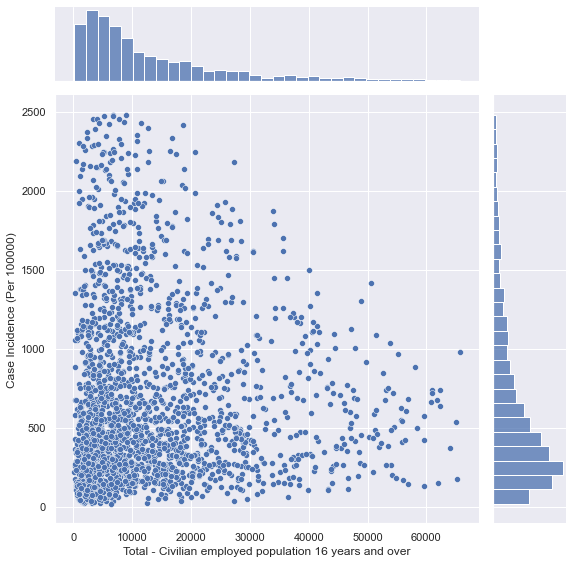

In [25]:
for var in usacovid_occup_clean:
    sb.jointplot(data = usacovid_occup_clean, x = "Total - Civilian employed population 16 years and over", y = var, height = 8)

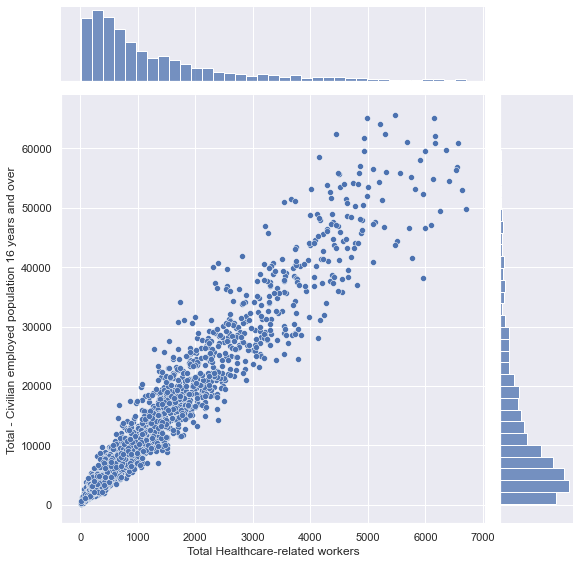

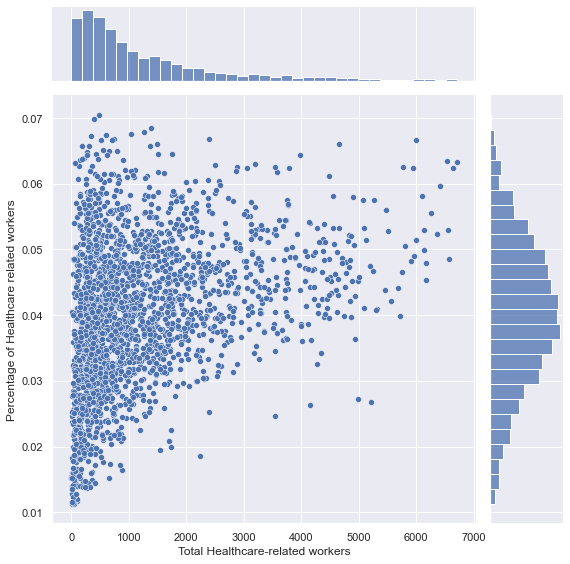

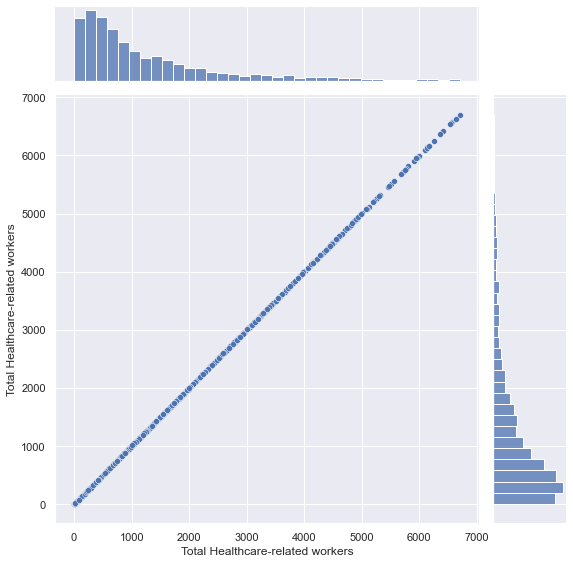

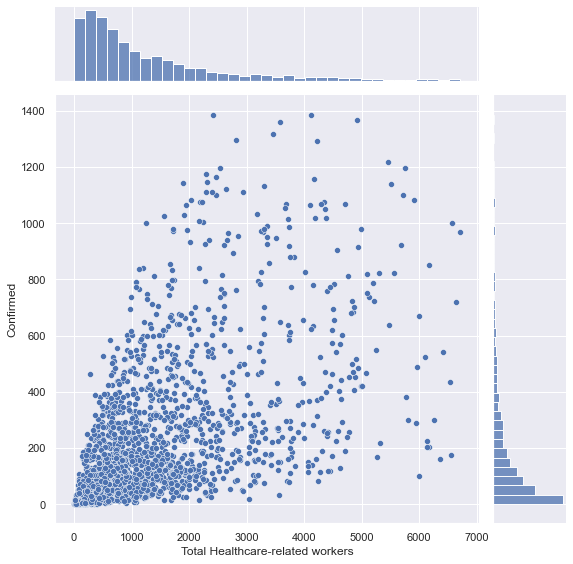

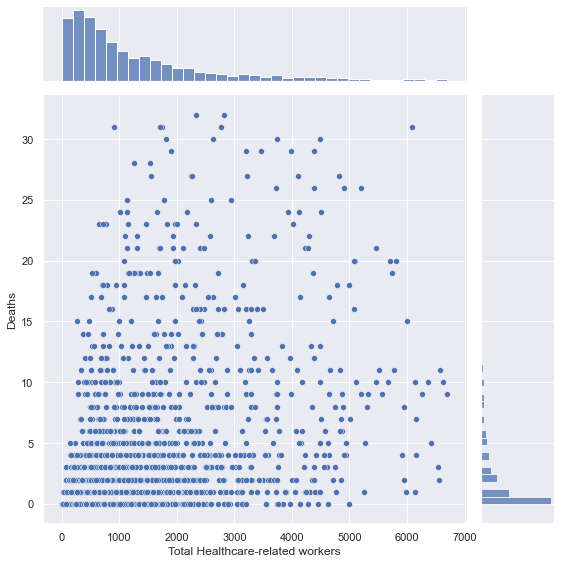

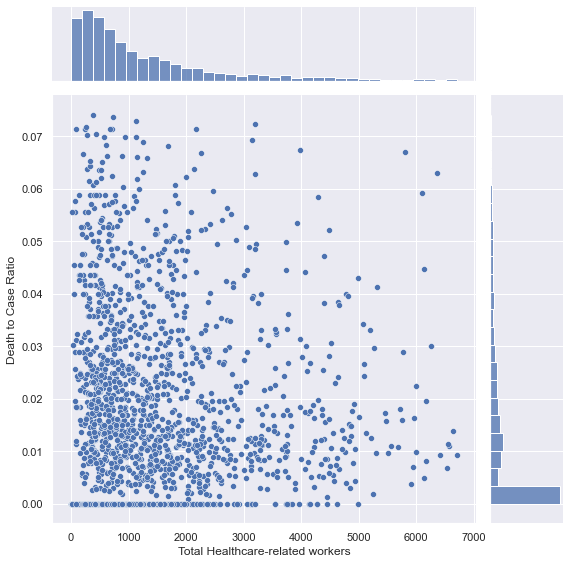

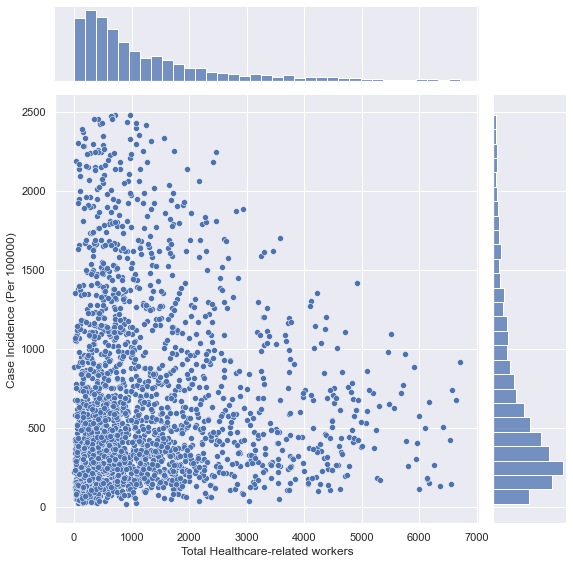

In [26]:
for var in usacovid_occup_clean:
    sb.jointplot(data = usacovid_occup_clean, x = "Total Healthcare-related workers", y = var, height = 8)

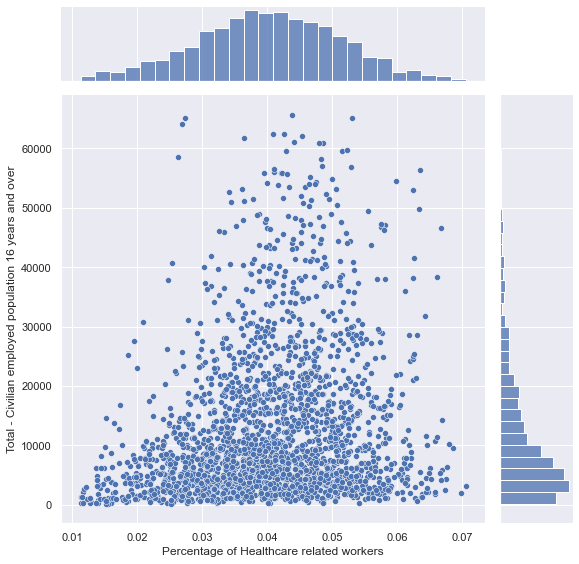

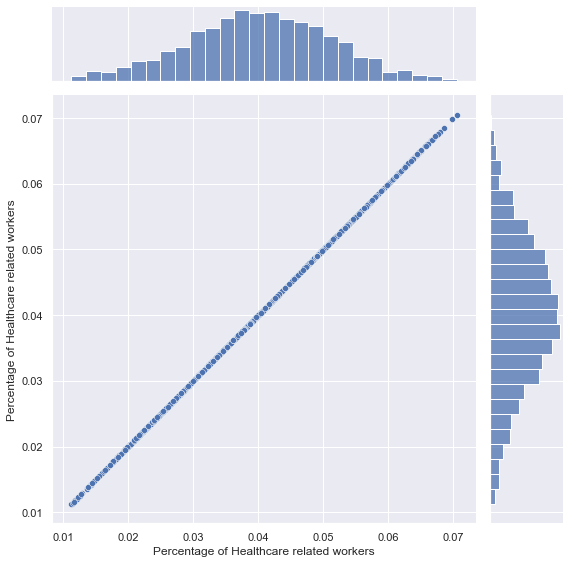

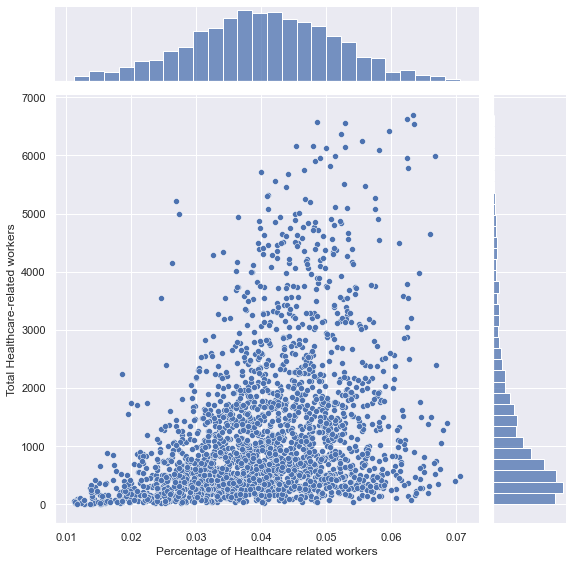

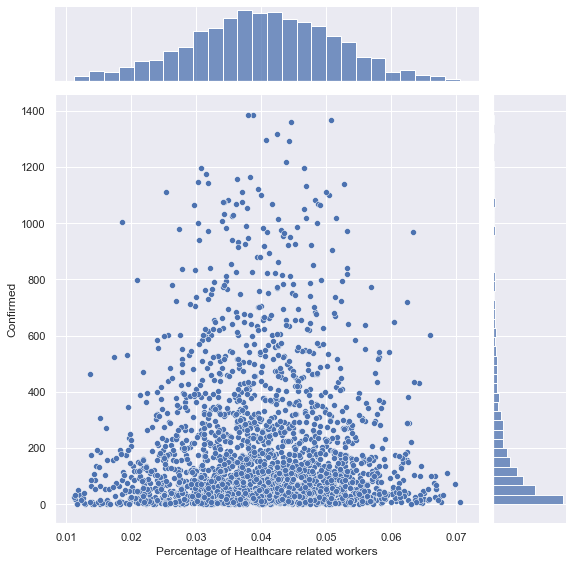

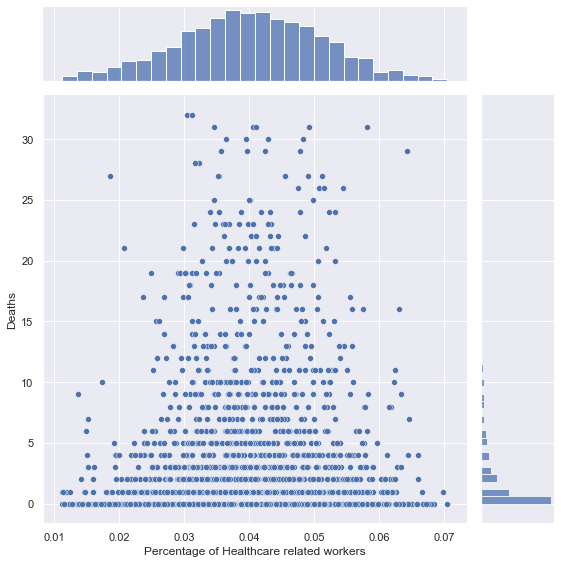

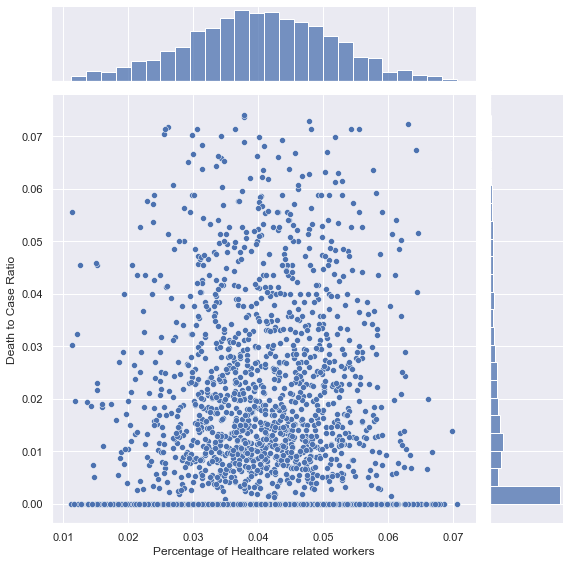

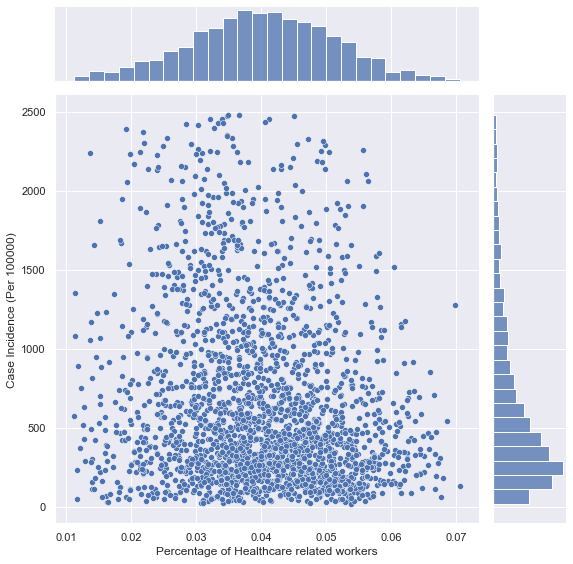

In [27]:
for var in usacovid_occup_clean:
    sb.jointplot(data = usacovid_occup_clean, x = "Percentage of Healthcare related workers", y = var, height = 8)

In [28]:
usacovid_occup_clean.corr()

,Total - Civilian employed population 16 years and over,Percentage of Healthcare related workers,Total Healthcare-related workers,Confirmed,Deaths,Death to Case Ratio,Case Incidence (Per 100000)
Total - Civilian employed population 16 years and over,1.000000,0.204618,0.965765,0.664888,0.463136,0.163979,0.030929
Percentage of Healthcare related workers,0.204618,1.000000,0.341177,-0.002978,0.025537,0.048366,-0.167401
Total Healthcare-related workers,0.965765,0.341177,1.000000,0.607930,0.435966,0.167089,-0.004773
Confirmed,0.664888,-0.002978,0.607930,1.000000,0.710262,0.167647,0.596100
Deaths,0.463136,0.025537,0.435966,0.710262,1.000000,0.584025,0.490067
Death to Case Ratio,0.163979,0.048366,0.167089,0.167647,0.584025,1.000000,0.218582
Case Incidence (Per 100000),0.030929,-0.167401,-0.004773,0.596100,0.490067,0.218582,1.000000


<AxesSubplot:>

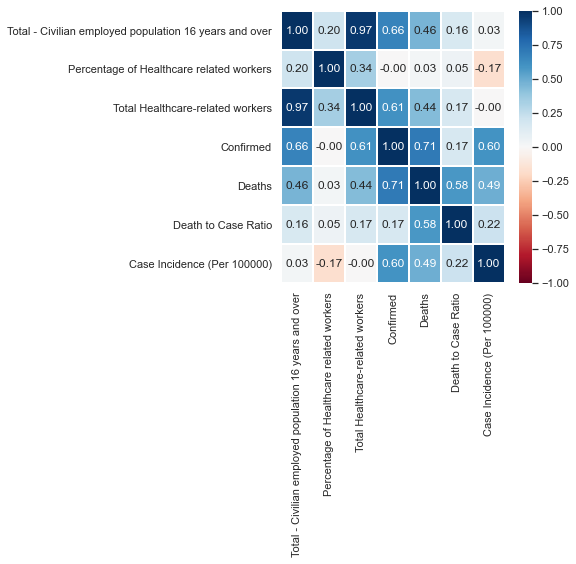

In [29]:
f = plt.figure(figsize=(5, 5))
sb.heatmap(usacovid_occup_clean.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 12}, cmap = "RdBu")

Here we see there is quite a vivid linear correlation between our predictor *Total - Civilian employed population 16 years and over and Total Healthcare-related workers* and the response variables, besides the low linear correlation between both of the predictors and *Death to Case Ratio* and *Case Incidence*. However, there is practically no linear correlation between *Percentage of Healthcare related workers* and the response variables, except a slight negative correlation with *Case Incidence*.  Nevertheless, let us continue and observe other aspects of occupation parameters to see if we can build a fruitful model for the response variable.

## Bi-Variate Analysis: Percent of Population with No Health Insurance Coverage as a Predictor Variable

In [30]:
usacovid_health = usacovid_occuphealth[['Percent of Population with No Health Insurance Coverage', 'Confirmed', 'Deaths', 'Death to Case Ratio', 'Case Incidence (Per 100000)']]
usacovid_health.head()

,Percent of Population with No Health Insurance Coverage,Confirmed,Deaths,Death to Case Ratio,Case Incidence (Per 100000)
0,7.1,932,20,0.021459,1688.405797
1,8.9,2727,17,0.006234,1310.383601
2,11.3,529,4,0.007561,2051.819099
3,10.7,327,2,0.006116,1451.591424
4,10.8,601,1,0.001664,1042.588256


In [31]:
usacovid_health.describe()

,Percent of Population with No Health Insurance Coverage,Confirmed,Deaths,Death to Case Ratio,Case Incidence (Per 100000)
count,3220.000000,3220.000000,3220.00000,3159.000000,3220.000000
mean,9.549627,1316.137578,45.27764,0.021551,878.110783
std,5.086483,6962.304363,456.31641,0.028900,983.144191
min,0.000000,0.000000,0.00000,0.000000,0.000000
25%,5.700000,43.000000,0.00000,0.000000,274.108881
50%,8.600000,158.000000,2.00000,0.012367,565.918482
75%,12.000000,585.000000,13.00000,0.029668,1165.665050
max,46.300000,224051.000000,23500.00000,0.285714,16306.278070


<AxesSubplot:>

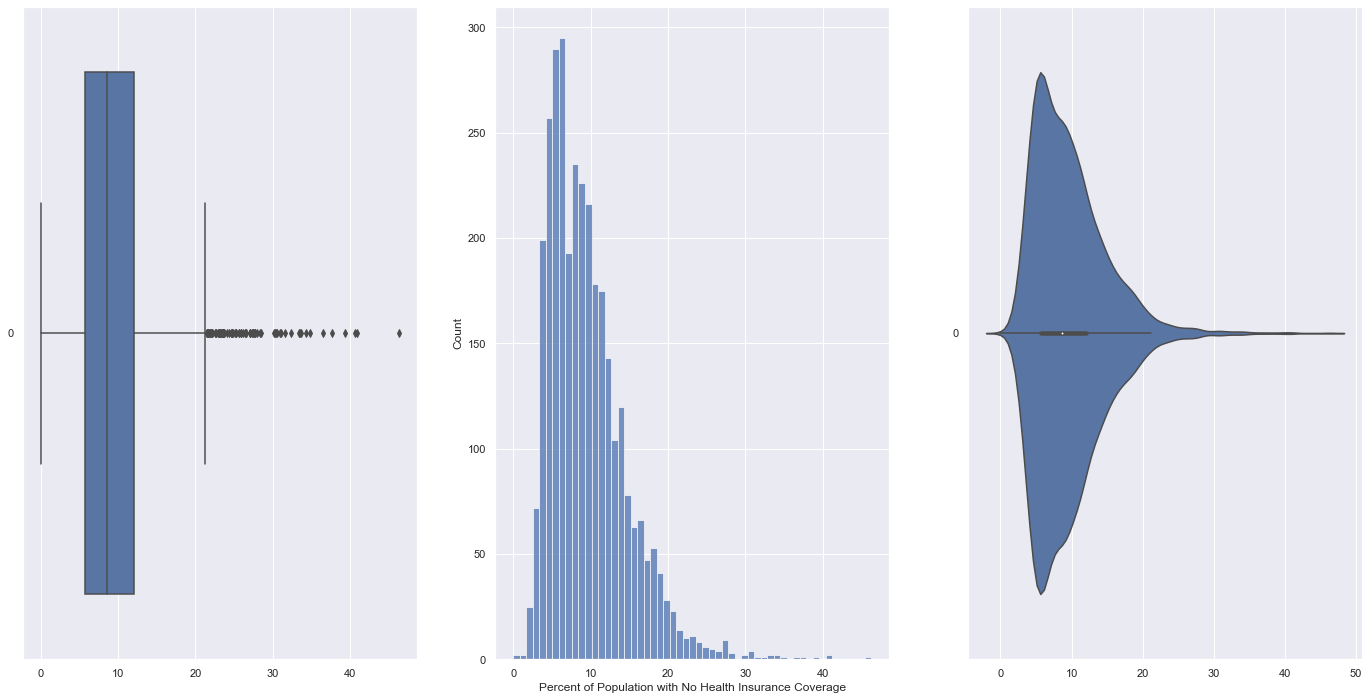

In [32]:
f, axes = plt.subplots(1, 3, figsize=(24, 12))

sb.boxplot(data = usacovid_health['Percent of Population with No Health Insurance Coverage'], orient = "h", ax = axes[0])
sb.histplot(data = usacovid_health['Percent of Population with No Health Insurance Coverage'], ax = axes[1])
sb.violinplot(data = usacovid_health['Percent of Population with No Health Insurance Coverage'], orient = "h", ax = axes[2])

In [33]:
usacovid_health['Percent of Population with No Health Insurance Coverage'].skew()

1.5032765069451965

We do see an interesting skewness of the Percent of Population with No Health Insurance Coverage, but it is mostly because it is a percentage instead of the exact number. Let us continue and analyse them more.

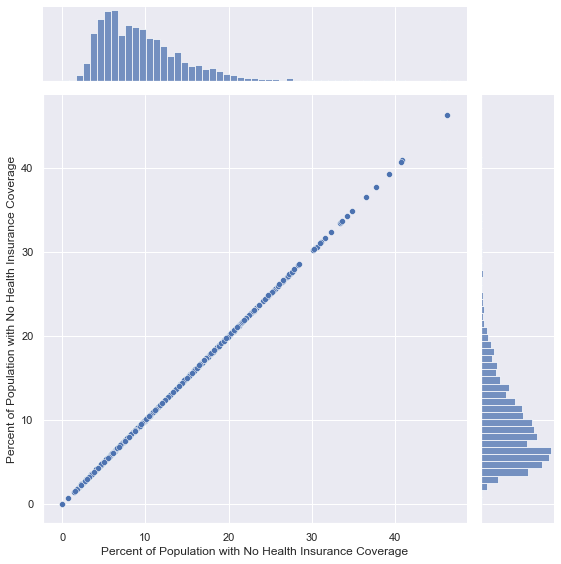

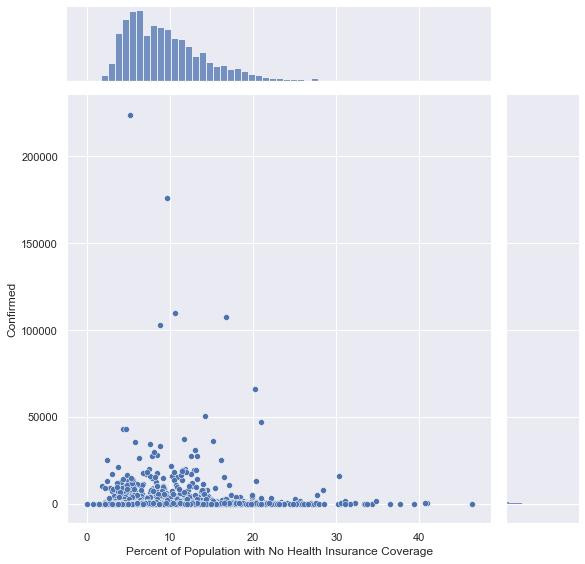

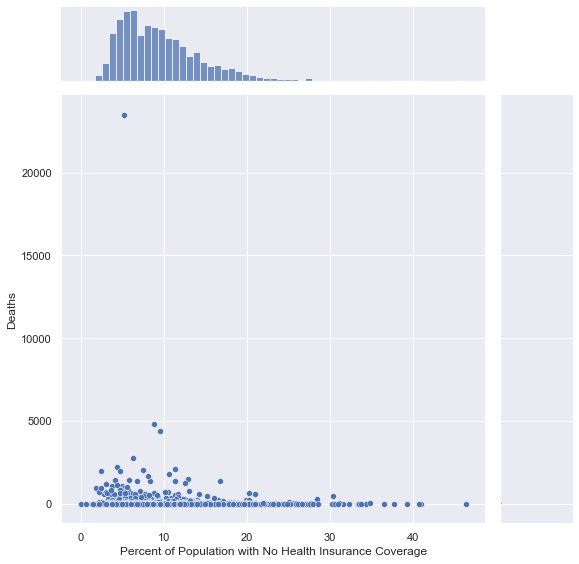

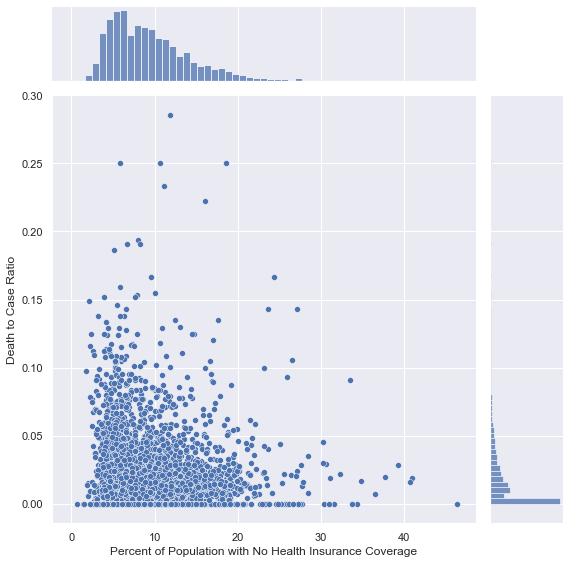

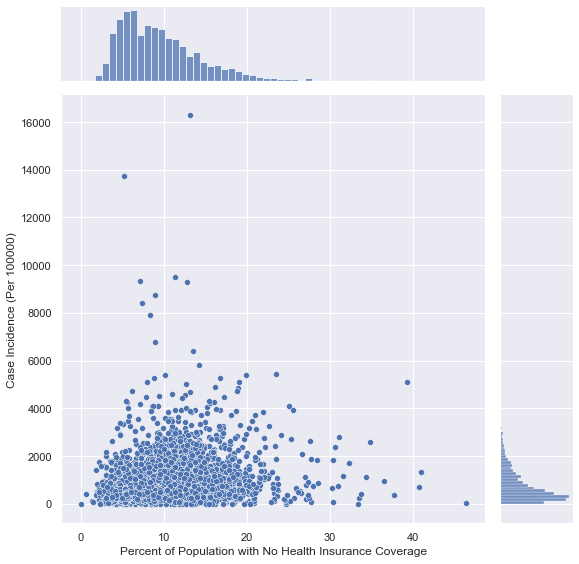

In [34]:
for var in usacovid_health:
    sb.jointplot(data = usacovid_health, x = "Percent of Population with No Health Insurance Coverage", y = var, height = 8)

In [35]:
usacovid_health.corr()

,Percent of Population with No Health Insurance Coverage,Confirmed,Deaths,Death to Case Ratio,Case Incidence (Per 100000)
Percent of Population with No Health Insurance Coverage,1.000000,0.002245,-0.035030,-0.059378,0.246788
Confirmed,0.002245,1.000000,0.794622,0.084918,0.296615
Deaths,-0.035030,0.794622,1.000000,0.135629,0.284435
Death to Case Ratio,-0.059378,0.084918,0.135629,1.000000,0.094840
Case Incidence (Per 100000),0.246788,0.296615,0.284435,0.094840,1.000000


<AxesSubplot:>

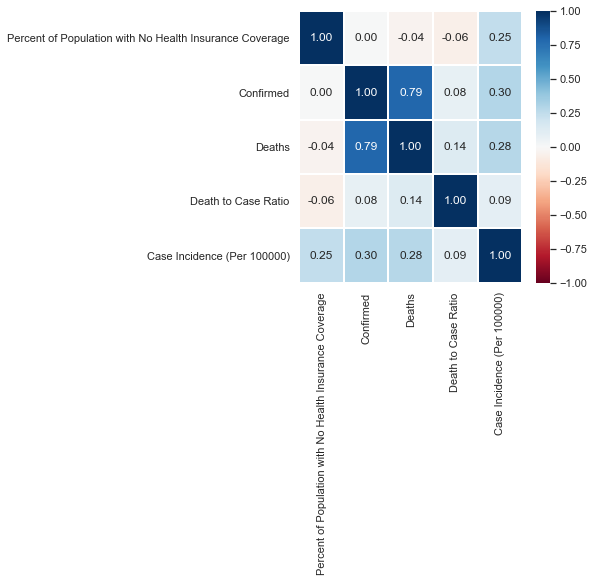

In [36]:
f = plt.figure(figsize=(5, 5))
sb.heatmap(usacovid_health.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 12}, cmap = "RdBu")

We note that there is relatively high relationship between Percent of Population with No Health Insurance Coverage and Case Incidence, compared to the previous Occupation predictors where there is practically no linear correlation between the Occupation predictors and the response variables. Let us remove the outliers to see if there is any changes. 

In [37]:
usacovid_health_clean = pd.DataFrame(removeOutliers(usacovid_health))
usacovid_health_clean.head()

,Percent of Population with No Health Insurance Coverage,Confirmed,Deaths,Death to Case Ratio,Case Incidence (Per 100000)
0,7.1,932.0,20.0,0.021459,1688.405797
2,11.3,529.0,4.0,0.007561,2051.819099
3,10.7,327.0,2.0,0.006116,1451.591424
4,10.8,601.0,1.0,0.001664,1042.588256
7,9.5,1157.0,6.0,0.005186,1005.230325


In [38]:
usacovid_health_clean.describe()

,Percent of Population with No Health Insurance Coverage,Confirmed,Deaths,Death to Case Ratio,Case Incidence (Per 100000)
count,2334.000000,2334.000000,2334.000000,2334.000000,2334.000000
mean,9.036590,210.206941,3.615253,0.013852,620.483093
std,4.228709,262.456240,5.998517,0.017008,524.818954
min,0.700000,1.000000,0.000000,0.000000,17.765145
25%,5.700000,36.000000,0.000000,0.000000,245.159715
50%,8.400000,105.000000,1.000000,0.008399,440.108748
75%,11.500000,277.750000,4.000000,0.022506,835.997844
max,21.200000,1386.000000,32.000000,0.074074,2480.875098


<AxesSubplot:>

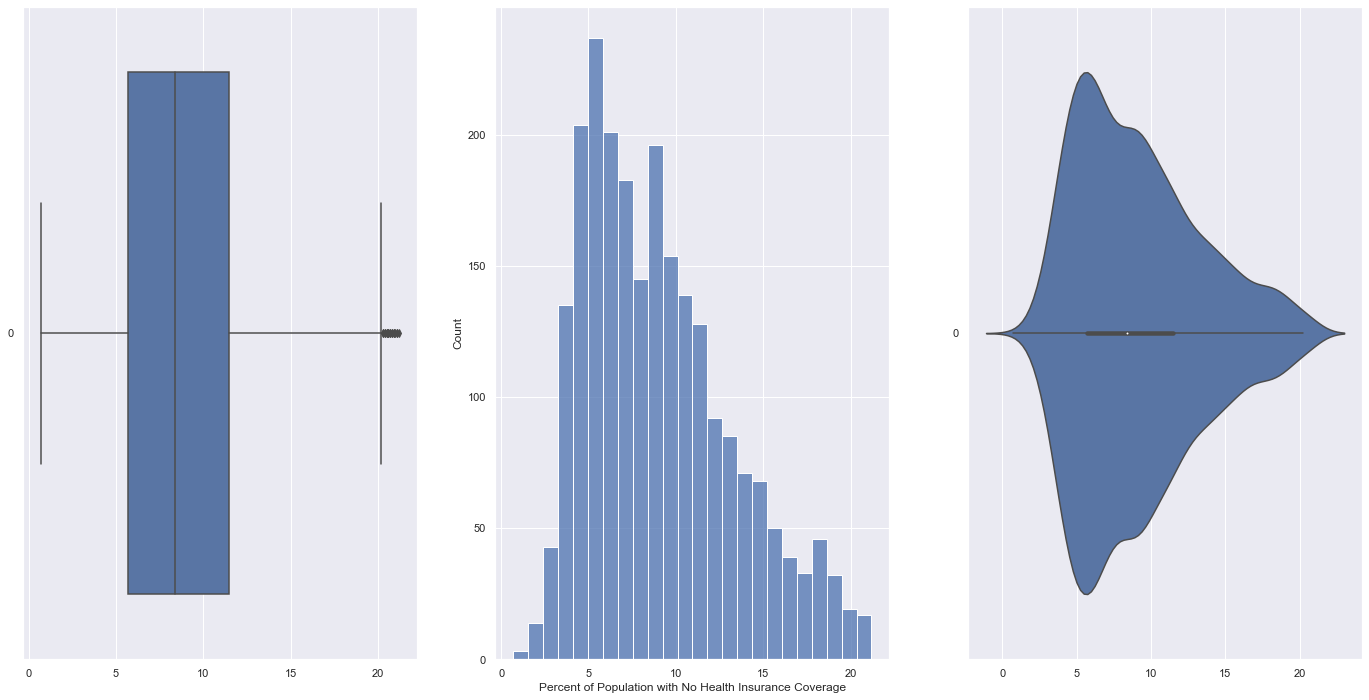

In [39]:
f, axes = plt.subplots(1, 3, figsize=(24, 12))

sb.boxplot(data = usacovid_health_clean['Percent of Population with No Health Insurance Coverage'], orient = "h", ax = axes[0])
sb.histplot(data = usacovid_health_clean['Percent of Population with No Health Insurance Coverage'], ax = axes[1])
sb.violinplot(data = usacovid_health_clean['Percent of Population with No Health Insurance Coverage'], orient = "h", ax = axes[2])

In [40]:
usacovid_health_clean['Percent of Population with No Health Insurance Coverage'].skew()

0.7309380042388953

With outliers removed, the skewness of the predictor Percent of Population with No Health Insurance Coverage is halved to 0.74. Let us carry on to the analysis and maybe we can acquire some fruitful insight. 

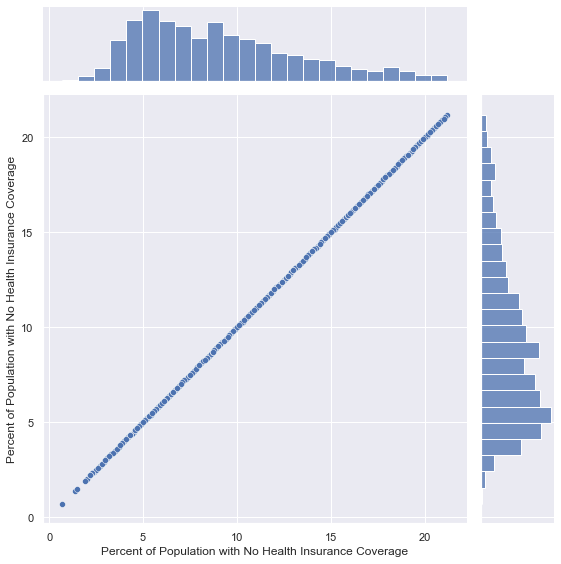

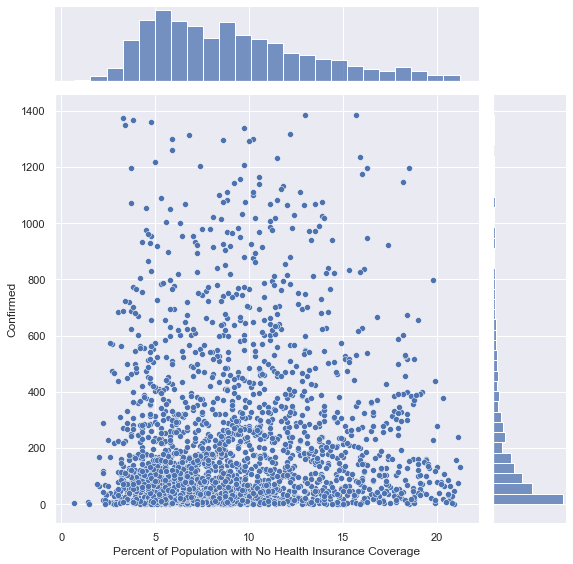

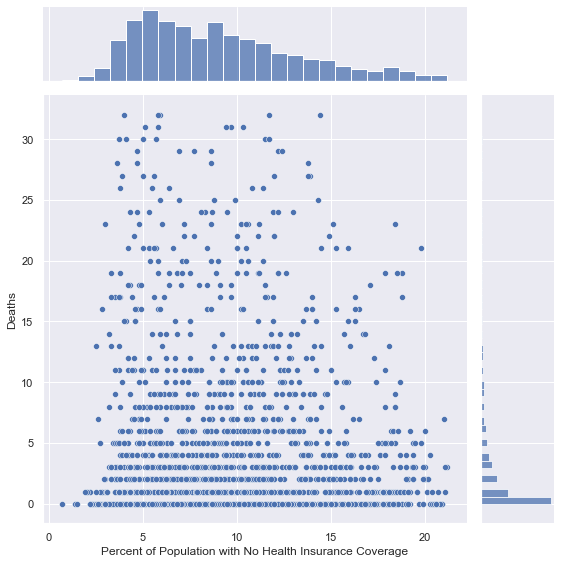

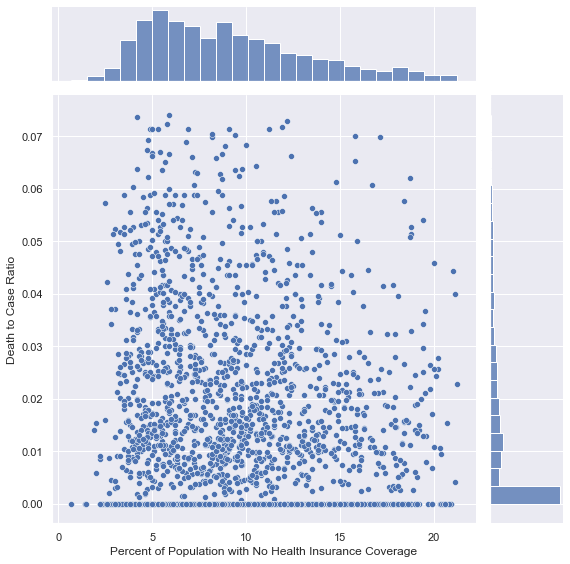

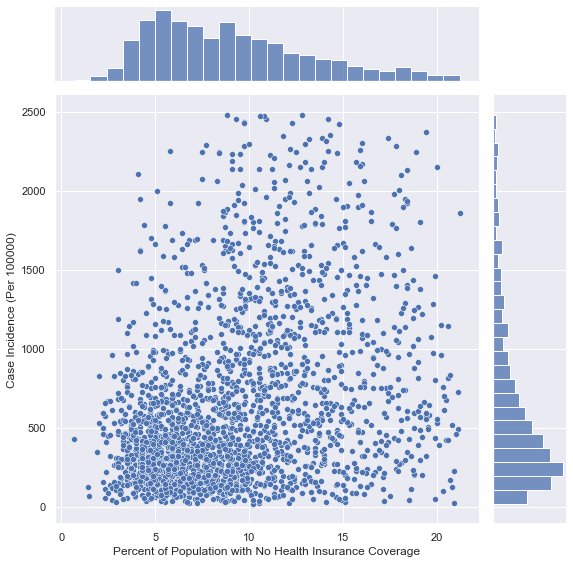

In [41]:
for var in usacovid_health_clean:
    sb.jointplot(data = usacovid_health_clean, x = "Percent of Population with No Health Insurance Coverage", y = var, height = 8)

In [42]:
usacovid_health_clean.corr()

,Percent of Population with No Health Insurance Coverage,Confirmed,Deaths,Death to Case Ratio,Case Incidence (Per 100000)
Percent of Population with No Health Insurance Coverage,1.000000,0.082522,0.047859,0.010760,0.330932
Confirmed,0.082522,1.000000,0.710603,0.157672,0.526882
Deaths,0.047859,0.710603,1.000000,0.573442,0.437629
Death to Case Ratio,0.010760,0.157672,0.573442,1.000000,0.211773
Case Incidence (Per 100000),0.330932,0.526882,0.437629,0.211773,1.000000


<AxesSubplot:>

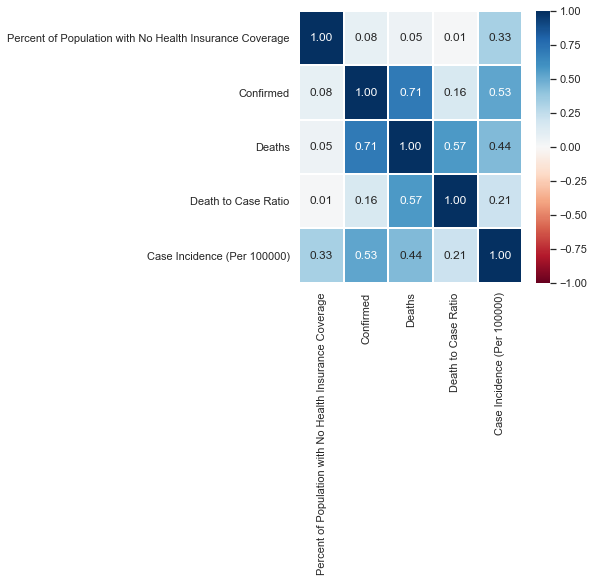

In [43]:
f = plt.figure(figsize=(5, 5))
sb.heatmap(usacovid_health_clean.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 12}, cmap = "RdBu")

Now this is surprising. Instead of the expected dip in the correlation, we see the opposite happening on both of the predictor variables against Deaths and Case Incidence. The relatively good correlation between Percent of Population with No Health Insurance Coverage and Case Incidence is a very important part here, because it really shows that the health insurance coverage will affect the Covid-19 cases.

## Multi-Variate Analysis: Creating a model to fit Response Variable

Moving forward with regression analysis, we will use the number of Confirmed cases as our response variable of choice as it makes sense both from a statistical perspective and geographic perspective. Statistically, Confirmed cases seems to have the highest correlation with each of our predictor variables, and geographically, it would make sense that when there are more individuals in a given household or county, the spread of the virus would quicken in those areas.

In [44]:
usacovid_ohmodel = usacovid_occuphealth[['Total - Civilian employed population 16 years and over', 'Percentage of Healthcare related workers', 'Percent of Population with No Health Insurance Coverage', 'Confirmed']]

In [45]:
usacovid_ohmodel.describe()

,Total - Civilian employed population 16 years and over,Percentage of Healthcare related workers,Percent of Population with No Health Insurance Coverage,Confirmed
count,3.220000e+03,3220.000000,3220.000000,3220.000000
mean,4.840705e+04,0.040779,9.549627,1316.137578
std,1.607070e+05,0.011618,5.086483,6962.304363
min,3.300000e+01,0.000000,0.000000,0.000000
25%,4.608000e+03,0.033565,5.700000,43.000000
50%,1.075000e+04,0.041086,8.600000,158.000000
75%,2.948300e+04,0.048482,12.000000,585.000000
max,4.929863e+06,0.118237,46.300000,224051.000000


Now we will split our data into 2 separate sets, train set and test set. We will start training our train set then use it to predict the test set. We utilise the 80:20 split here.

In [46]:
# Removing outliers before train_test_split
usacovid_ohmodel = pd.DataFrame(removeOutliers(usacovid_ohmodel))
usacovid_ohmodel.head()

,Total - Civilian employed population 16 years and over,Percentage of Healthcare related workers,Percent of Population with No Health Insurance Coverage,Confirmed
0,24522,0.036467,7.1,932.0
2,8413,0.019393,11.3,529.0
3,8387,0.027079,10.7,327.0
4,21917,0.041669,10.8,601.0
5,4319,0.019223,11.4,409.0


In [47]:
usacovid_ohmodel.describe()

,Total - Civilian employed population 16 years and over,Percentage of Healthcare related workers,Percent of Population with No Health Insurance Coverage,Confirmed
count,2555.000000,2555.000000,2555.000000,2555.000000
mean,13217.025832,0.040206,9.219100,222.331115
std,13026.600328,0.010848,4.252547,274.573892
min,113.000000,0.011295,0.700000,0.000000
25%,4204.000000,0.032856,5.800000,36.000000
50%,8566.000000,0.040281,8.600000,111.000000
75%,17942.500000,0.047892,11.800000,296.500000
max,66728.000000,0.070517,21.100000,1386.000000


In [48]:
usacovid_ohmodel_train, usacovid_ohmodel_test = train_test_split(usacovid_ohmodel, test_size=0.2)

In [49]:
usa_occuphealth_predictors_train = pd.DataFrame(usacovid_ohmodel_train[['Total - Civilian employed population 16 years and over', 'Percentage of Healthcare related workers', 'Percent of Population with No Health Insurance Coverage',]])
usa_occuphealth_response_train = pd.DataFrame(usacovid_ohmodel_train[['Confirmed']])
usa_occuphealth_predictors_test = pd.DataFrame(usacovid_ohmodel_test[['Total - Civilian employed population 16 years and over', 'Percentage of Healthcare related workers', 'Percent of Population with No Health Insurance Coverage']])
usa_occuphealth_response_test = pd.DataFrame(usacovid_ohmodel_test[['Confirmed']])

It should be noted here that the train_test_split function of SciKit-Learn is random, and thus results may differ from each run of the analysis

In [50]:
linreg.fit(usa_occuphealth_predictors_train, usa_occuphealth_response_train)

LinearRegression()

In [51]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)
pd.DataFrame(list(zip(usa_occuphealth_predictors_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

Intercept 	: b =  [-14.91268248]
Coefficients 	: a =  [[ 1.34483910e-02 -2.27304991e+03  1.58062564e+01]]


,Predictors,Coefficients
0,Total - Civilian employed population 16 years ...,0.013448
1,Percentage of Healthcare related workers,-2273.049914
2,Percent of Population with No Health Insurance...,15.806256


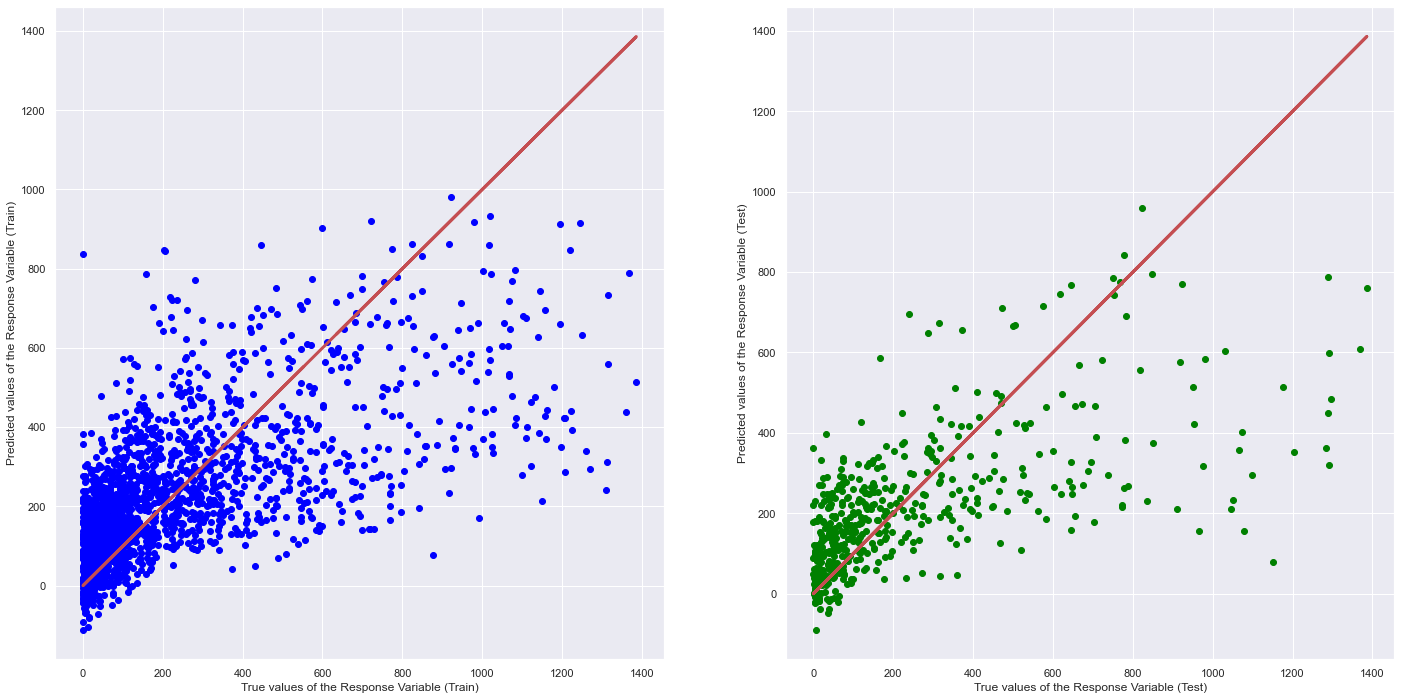

In [52]:
# Predict the Total values from Predictors
usa_occuphealth_response_train_pred = linreg.predict(usa_occuphealth_predictors_train)
usa_occuphealth_response_test_pred = linreg.predict(usa_occuphealth_predictors_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(usa_occuphealth_response_train, usa_occuphealth_response_train_pred, color = "blue")
axes[0].plot(usa_occuphealth_response_train, usa_occuphealth_response_train, 'r-', linewidth = 3)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(usa_occuphealth_response_test, usa_occuphealth_response_test_pred, color = "green")
axes[1].plot(usa_occuphealth_response_test, usa_occuphealth_response_test, 'r-', linewidth = 3)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [53]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(usa_occuphealth_predictors_train, usa_occuphealth_response_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(usa_occuphealth_response_train, usa_occuphealth_response_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(usa_occuphealth_predictors_test, usa_occuphealth_response_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(usa_occuphealth_response_test, usa_occuphealth_response_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.43585895231584837
Mean Squared Error (MSE) 	: 41232.36147226899

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.41082742963645924
Mean Squared Error (MSE) 	: 49603.66591142873



In [54]:
from sklearn.tree import DecisionTreeRegressor

# Linear Regression using Train Data
dt = DecisionTreeRegressor(max_depth=6)
dt.fit(usa_occuphealth_predictors_train, usa_occuphealth_response_train)

# Predict the Total values from Predictors
y_train_pred = dt.predict(usa_occuphealth_predictors_train)
y_test_pred = dt.predict(usa_occuphealth_predictors_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", dt.score(usa_occuphealth_predictors_train, usa_occuphealth_response_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(usa_occuphealth_response_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", dt.score(usa_occuphealth_predictors_test, usa_occuphealth_response_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(usa_occuphealth_response_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6153561122724982
Mean Squared Error (MSE) 	: 28113.13922641327

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.3755293075693753
Mean Squared Error (MSE) 	: 52575.4883322113



## Regression Analysis: Using only Percent of Population with No Health Insurance Coverage

In [55]:
usa_healthcare_totalemp_train = pd.DataFrame(usacovid_ohmodel_train[['Percent of Population with No Health Insurance Coverage']])
usa_healthcare_confirmed_train = pd.DataFrame(usacovid_ohmodel_train[['Confirmed']])
usa_healthcare_totalemp_test = pd.DataFrame(usacovid_ohmodel_test[['Percent of Population with No Health Insurance Coverage']])
usa_healthcare_confirmed_test = pd.DataFrame(usacovid_ohmodel_test[['Confirmed']])

In [56]:
linreg.fit(usa_healthcare_totalemp_train, usa_healthcare_confirmed_train)

LinearRegression()

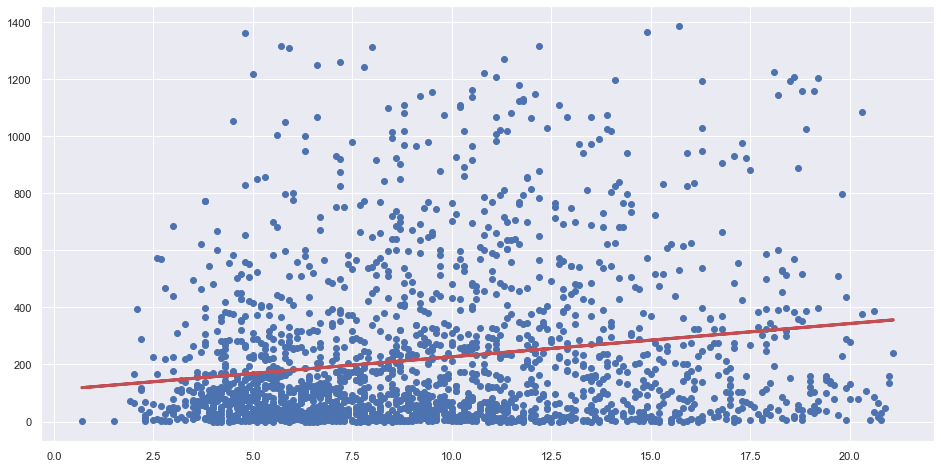

In [57]:
# Formula for the Regression line
regline_x = usa_healthcare_totalemp_train
regline_y = linreg.intercept_ + linreg.coef_ * usa_healthcare_totalemp_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(usa_healthcare_totalemp_train, usa_healthcare_confirmed_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

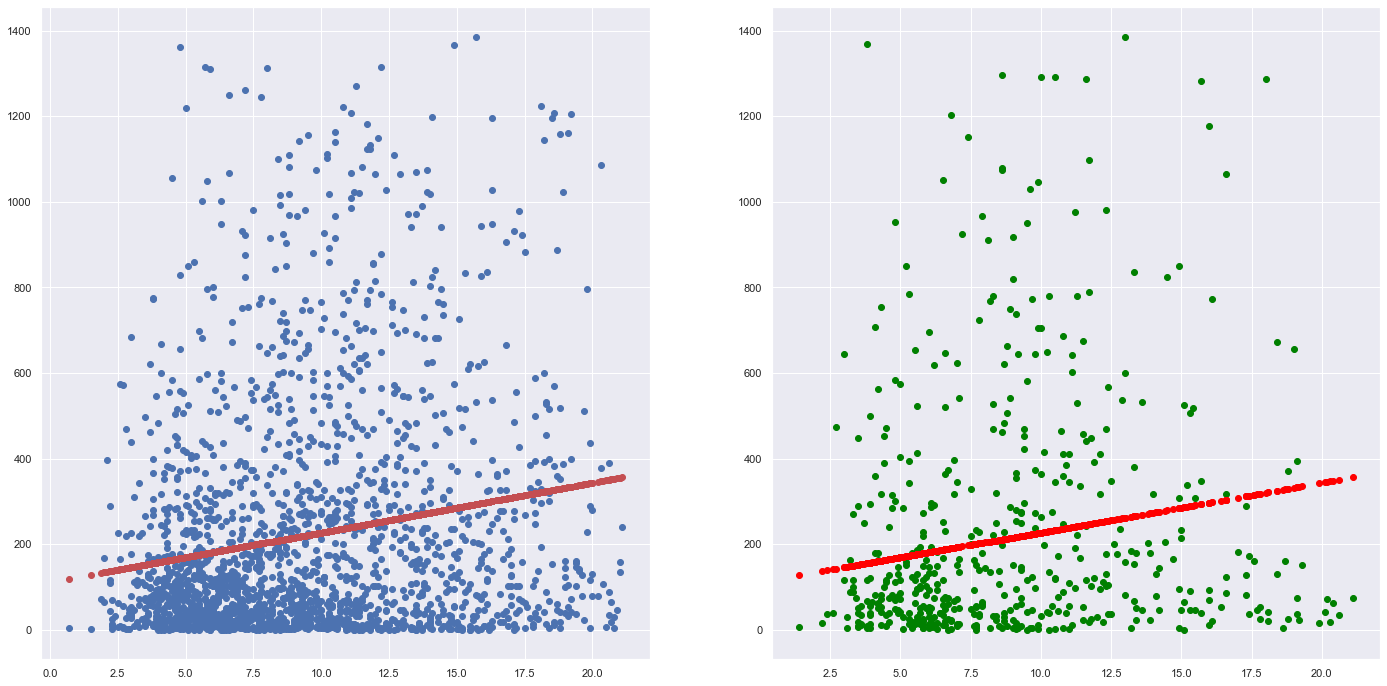

In [58]:
usa_healthcare_confirmed_train_pred = linreg.predict(usa_healthcare_totalemp_train)

# Plot the Linear Regression line
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(usa_healthcare_totalemp_train, usa_healthcare_confirmed_train)
axes[0].scatter(usa_healthcare_totalemp_train, usa_healthcare_confirmed_train_pred, color = "r")

usa_healthcare_confirmed_test_pred = linreg.predict(usa_healthcare_totalemp_test)

# Plot the Predictions
axes[1].scatter(usa_healthcare_totalemp_test, usa_healthcare_confirmed_test, color = "green")
axes[1].scatter(usa_healthcare_totalemp_test, usa_healthcare_confirmed_test_pred, color = "red")
plt.show()

In [59]:
# Explained Variance (R^2)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(usa_healthcare_totalemp_train, usa_healthcare_confirmed_train))

mse = mean_sq_err(usa_healthcare_confirmed_train, usa_healthcare_confirmed_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))
print("")

# Explained Variance (R^2)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(usa_healthcare_totalemp_test, usa_healthcare_confirmed_test))

mse = mean_sq_err(usa_healthcare_confirmed_test, usa_healthcare_confirmed_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.0336921967381234
Mean Squared Error (MSE) 	: 70626.22512778942
Root Mean Squared Error (RMSE) 	: 265.755950314926

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.004196029757354891
Mean Squared Error (MSE) 	: 83838.81045703072
Root Mean Squared Error (RMSE) 	: 289.5493230125581


In [60]:
# Linear Regression using Train Data
dt = DecisionTreeRegressor(max_depth=6)
dt.fit(usa_healthcare_totalemp_train, usa_healthcare_confirmed_train)

# Predict the Total values from Predictors
y_train_pred = dt.predict(usa_healthcare_totalemp_train)
y_test_pred = dt.predict(usa_healthcare_totalemp_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", dt.score(usa_healthcare_totalemp_train, usa_healthcare_confirmed_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(usa_healthcare_confirmed_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", dt.score(usa_healthcare_totalemp_test, usa_healthcare_confirmed_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(usa_healthcare_confirmed_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.07492315549173378
Mean Squared Error (MSE) 	: 67612.70607585032

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.00947658993954148
Mean Squared Error (MSE) 	: 83394.22909618978

